# 图像尺寸和分辨率分析

训练集 图像数量: 44000
分析 训练集 中的图像尺寸...


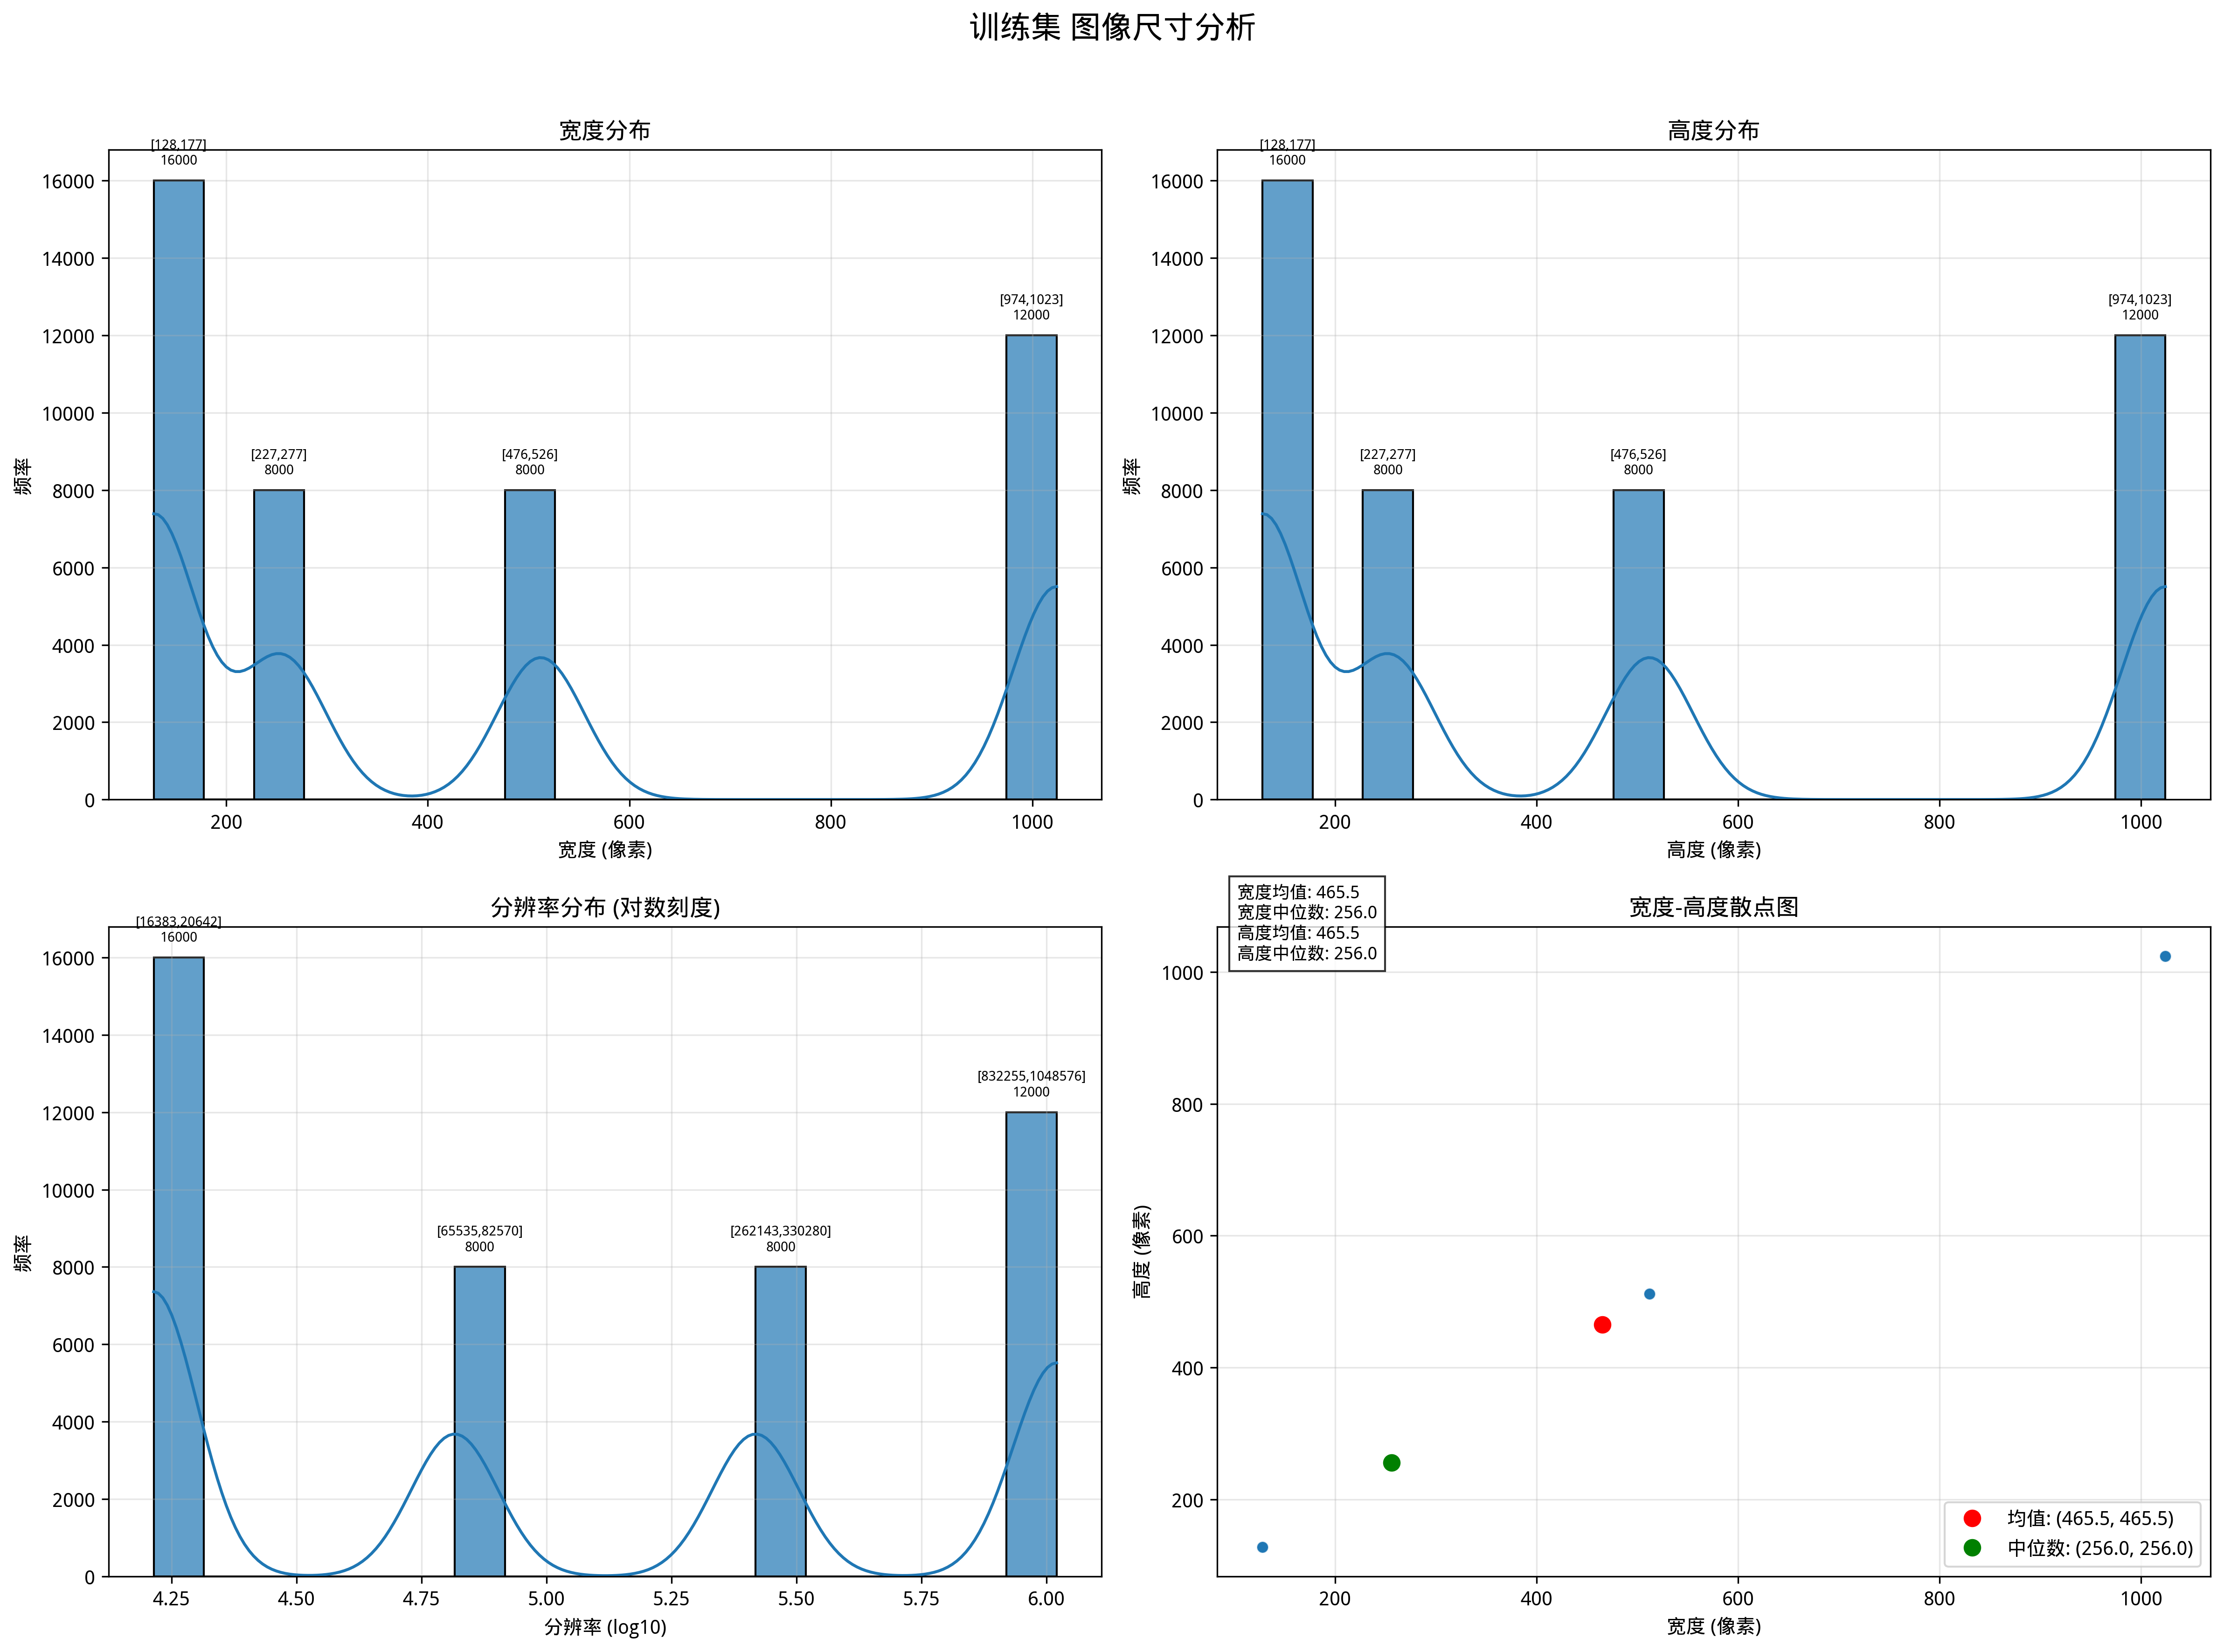

测试集 图像数量: 11000
分析 测试集 中的图像尺寸...


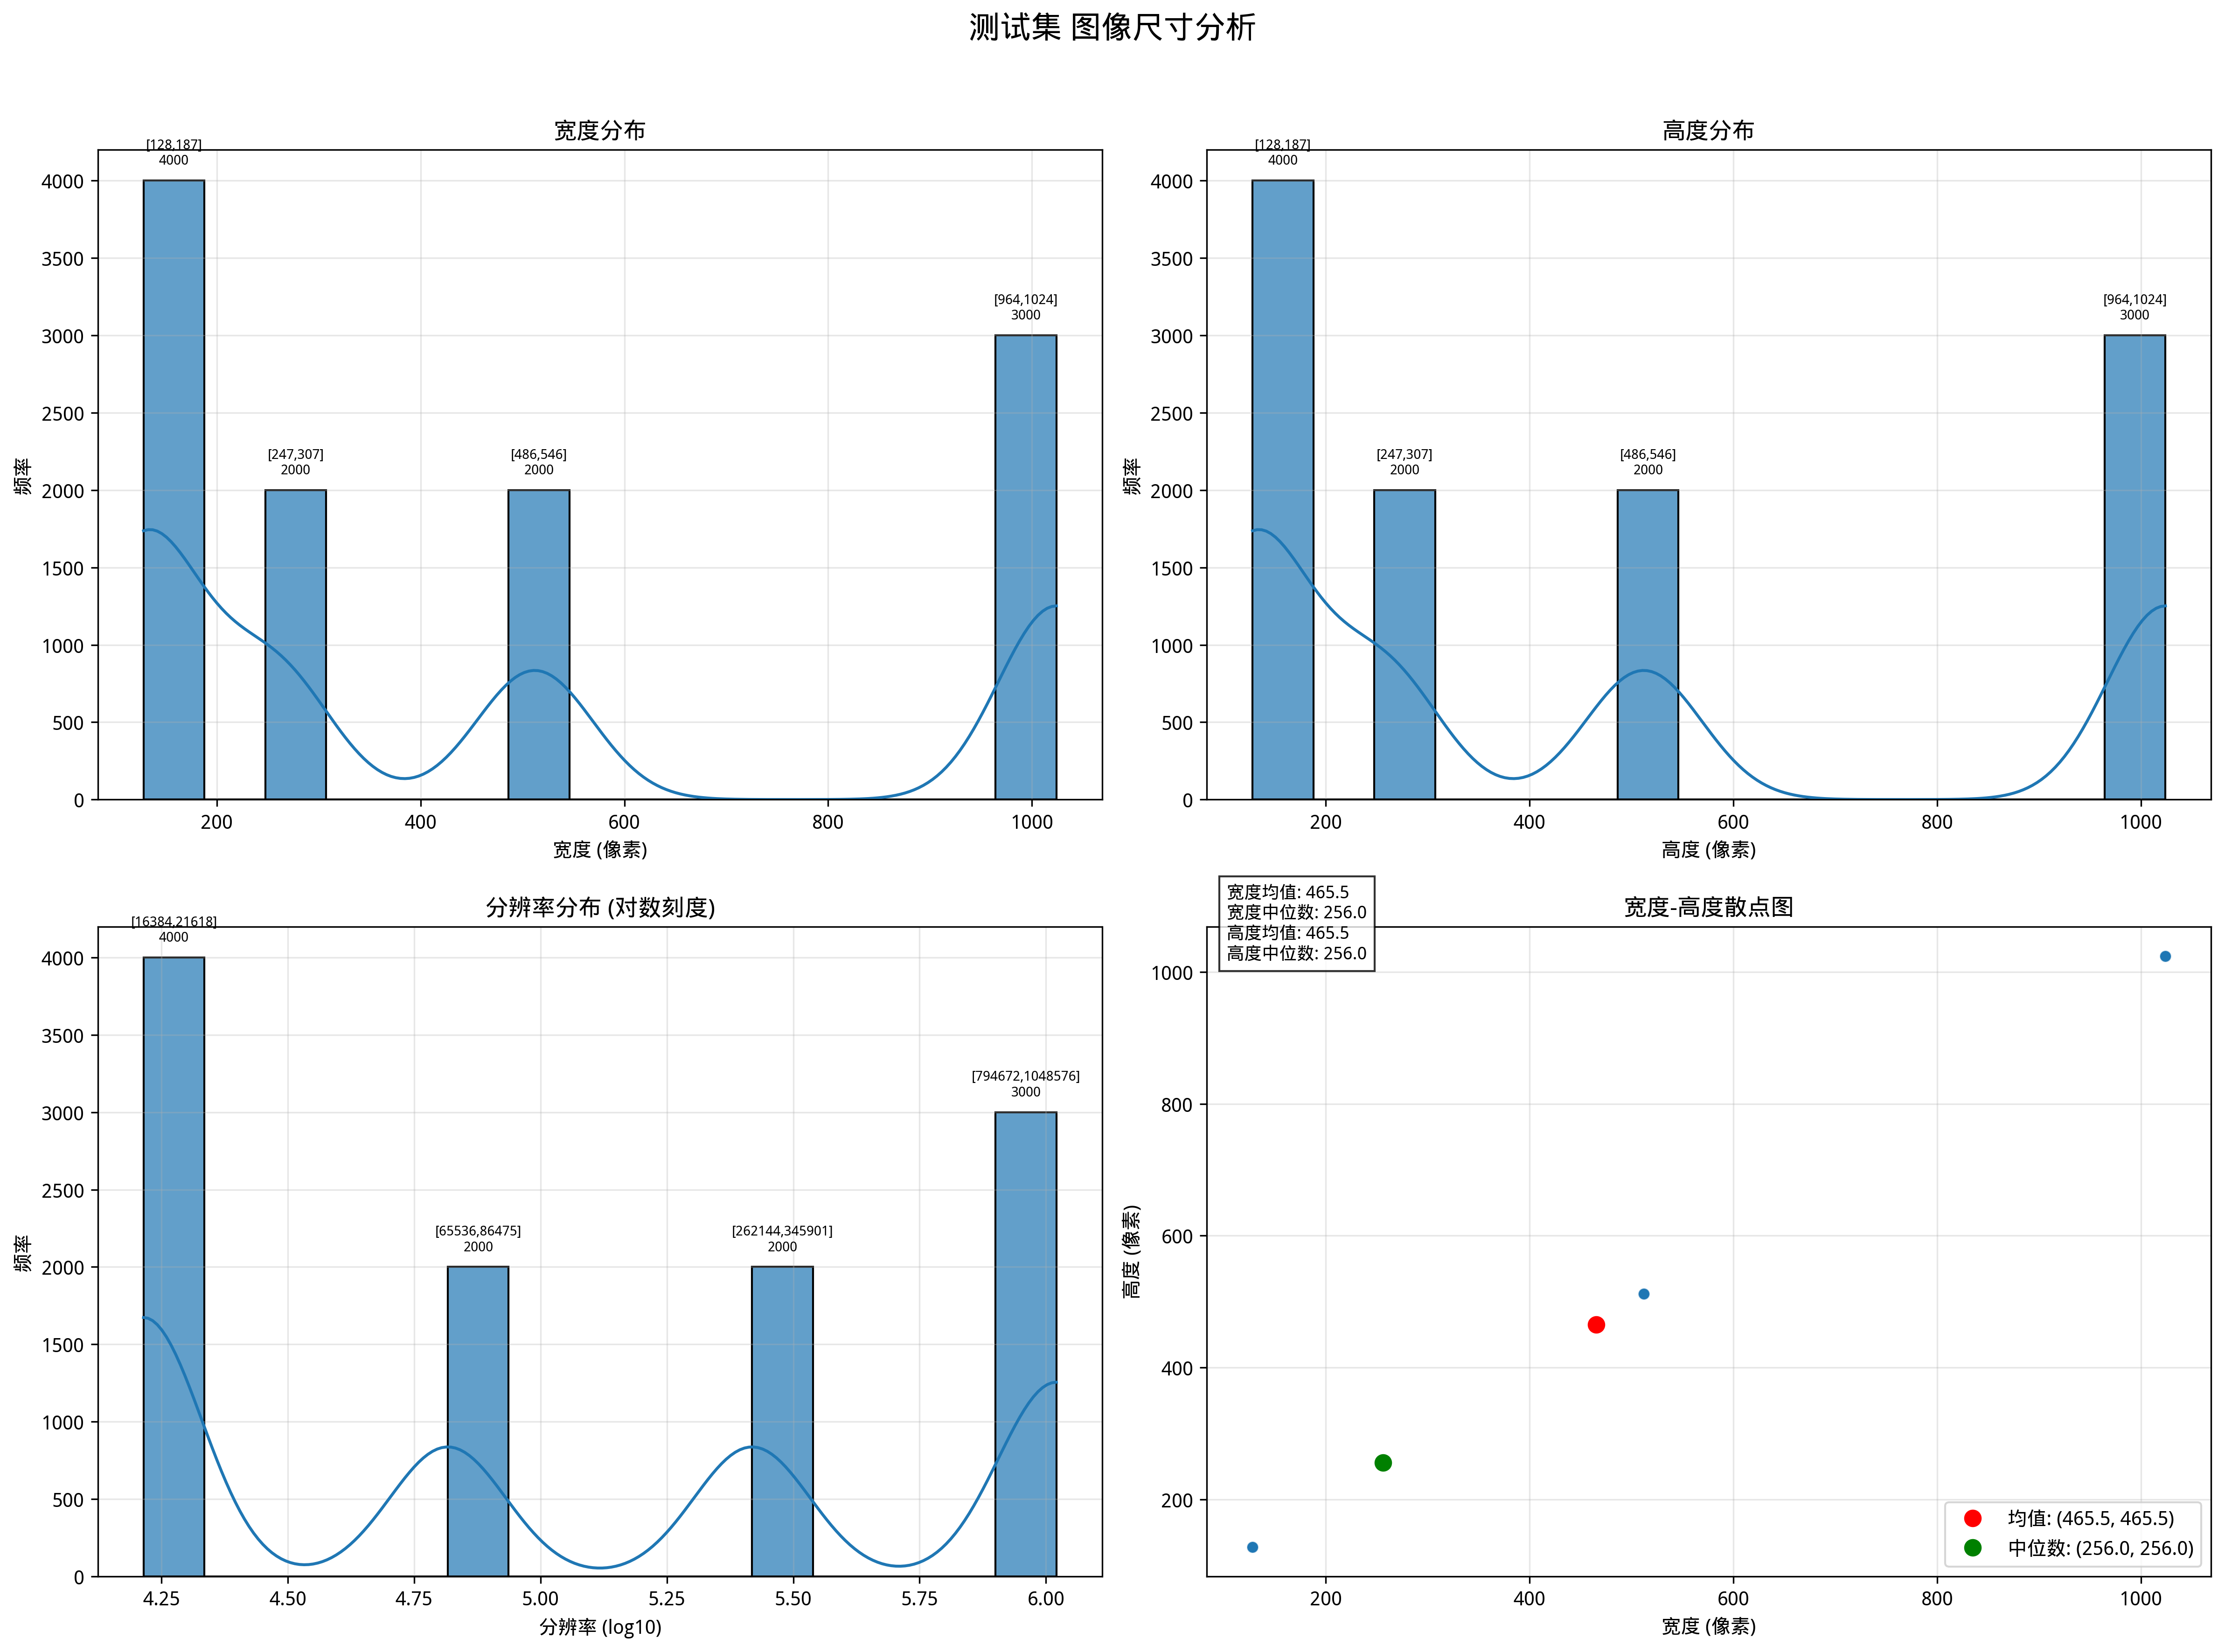

测试外集 图像数量: 22000
分析 测试外集 中的图像尺寸...


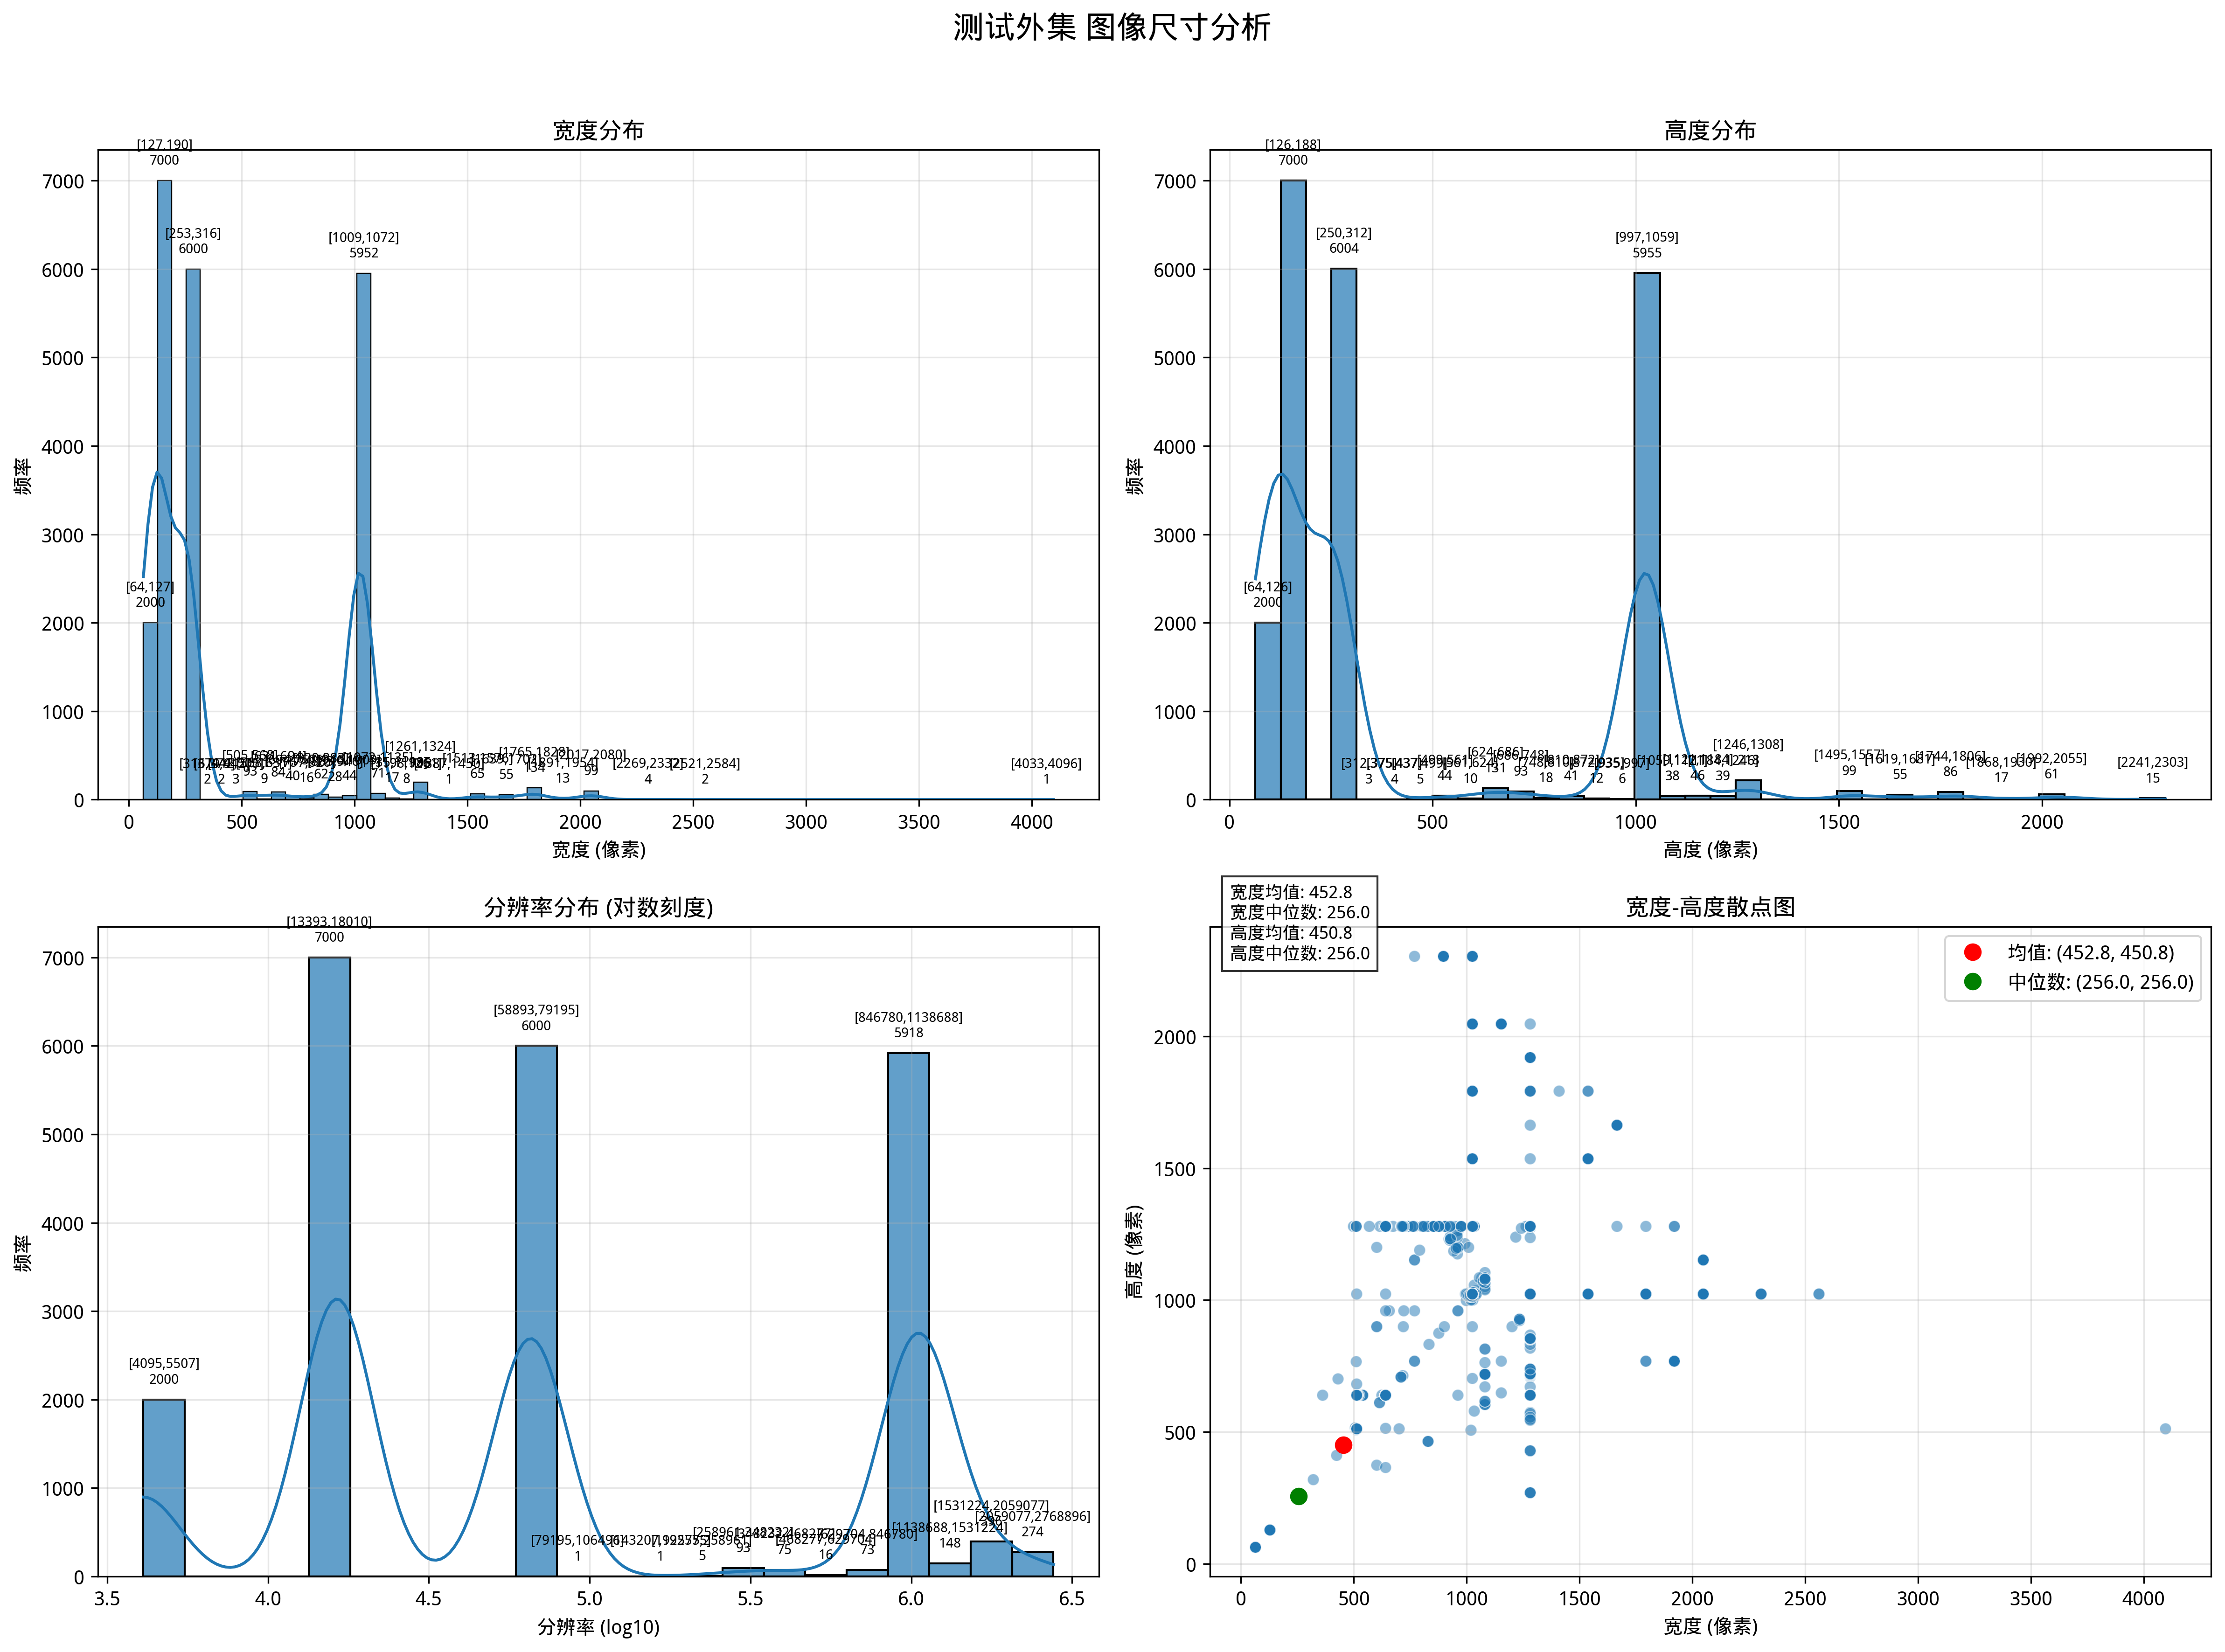


图像尺寸统计结果:
dataset  total_images  valid_images  width_mean  width_median  width_min  width_max  height_mean  height_median  height_min  height_max  resolution_mean  resolution_median  resolution_min  resolution_max
    训练集         44000         44000  465.454545         256.0        128       1024   465.454545          256.0         128        1024    351511.272727            65536.0           16384         1048576
    测试集         11000         11000  465.454545         256.0        128       1024   465.454545          256.0         128        1024    351511.272727            65536.0           16384         1048576
   测试外集         22000         22000  452.807364         256.0         64       4096   450.843273          256.0          64        2304    379191.300273            65536.0            4096         2768896


In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

def read_image_paths(file_path):
    """读取txt文件中的图像路径"""
    if not os.path.exists(file_path):
        print(f"文件不存在: {file_path}")
        return []
    
    with open(file_path, 'r') as f:
        paths = [line.strip().split()[0] for line in f if line.strip()]
    return paths

def get_image_dimensions(image_path):
    """获取图像的宽度和高度"""
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            resolution = width * height
        return width, height, resolution
    except Exception as e:
        print(f"无法读取图像 {image_path}: {e}")
        return None, None, None

def analyze_image_dimensions(dataset_name, paths):
    """分析图像尺寸并返回统计数据"""
    print(f"分析 {dataset_name} 中的图像尺寸...")
    
    widths = []
    heights = []
    resolutions = []
    
    total_images = len(paths)
    valid_images = 0
    
    for i, path in enumerate(paths):
        if not os.path.exists(path):
            print(f"警告: 图像路径不存在 - {path}")
            continue
            
        width, height, resolution = get_image_dimensions(path)
        if width and height:
            widths.append(width)
            heights.append(height)
            resolutions.append(resolution)
            valid_images += 1
    
    if valid_images == 0:
        print(f"警告: {dataset_name} 中没有找到有效的图像")
        return None
    
    # 创建统计数据框
    data = {
        'width': widths,
        'height': heights,
        'resolution': resolutions
    }
    df = pd.DataFrame(data)
    
    # 计算统计指标
    stats = {
        'dataset': dataset_name,
        'total_images': total_images,
        'valid_images': valid_images,
        'width_mean': df['width'].mean(),
        'width_median': df['width'].median(),
        'width_min': df['width'].min(),
        'width_max': df['width'].max(),
        'height_mean': df['height'].mean(),
        'height_median': df['height'].median(),
        'height_min': df['height'].min(),
        'height_max': df['height'].max(),
        'resolution_mean': df['resolution'].mean(),
        'resolution_median': df['resolution'].median(),
        'resolution_min': df['resolution'].min(),
        'resolution_max': df['resolution'].max()
    }

    return df, pd.DataFrame([stats])

def plot_distributions(df, dataset_name):
    """为单个数据集在同一画布上绘制四个图表，并标注完整的横纵坐标数值"""
    # 设置图片清晰度和字体
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'WenQuanYi Zen Hei']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 创建2x2子图布局
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{dataset_name} 图像尺寸分析', fontsize=16)
    
    # 1. 宽度分布 - 第一个子图
    ax = axes[0, 0]
    sns.histplot(df['width'], kde=True, alpha=0.7, ax=ax)
    ax.set_title('宽度分布')
    ax.set_xlabel('宽度 (像素)')
    ax.set_ylabel('频率')
    ax.grid(True, alpha=0.3)
    
    # 标注直方图横纵坐标数值
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x_start = p.get_x()
            x_end = x_start + p.get_width()
            ax.text(x_start + p.get_width()/2, height + 0.02*max(ax.get_ylim()),
                    f'[{int(x_start)},{int(x_end)}]\n{int(height)}',
                    ha='center', va='bottom', fontsize=7)
    
    # 2. 高度分布 - 第二个子图
    ax = axes[0, 1]
    sns.histplot(df['height'], kde=True, alpha=0.7, ax=ax)
    ax.set_title('高度分布')
    ax.set_xlabel('高度 (像素)')
    ax.set_ylabel('频率')
    ax.grid(True, alpha=0.3)
    
    # 标注直方图横纵坐标数值
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x_start = p.get_x()
            x_end = x_start + p.get_width()
            ax.text(x_start + p.get_width()/2, height + 0.02*max(ax.get_ylim()),
                    f'[{int(x_start)},{int(x_end)}]\n{int(height)}',
                    ha='center', va='bottom', fontsize=7)
    
    # 3. 分辨率分布 - 第三个子图
    ax = axes[1, 0]
    resolution_log = np.log10(df['resolution'])
    sns.histplot(resolution_log, kde=True, alpha=0.7, ax=ax)
    ax.set_title('分辨率分布 (对数刻度)')
    ax.set_xlabel('分辨率 (log10)')
    ax.set_ylabel('频率')
    ax.grid(True, alpha=0.3)
    
    # 标注直方图横纵坐标数值（转换为实际分辨率）
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            x_start = p.get_x()
            x_end = x_start + p.get_width()
            res_start = 10 ** x_start
            res_end = 10 ** x_end
            ax.text(x_start + p.get_width()/2, height + 0.02*max(ax.get_ylim()),
                    f'[{int(res_start)},{int(res_end)}]\n{int(height)}',
                    ha='center', va='bottom', fontsize=7)
    
    # 4. 宽度-高度散点图 - 第四个子图
    ax = axes[1, 1]
    sns.scatterplot(x='width', y='height', data=df, alpha=0.5, ax=ax)
    ax.set_title('宽度-高度散点图')
    ax.set_xlabel('宽度 (像素)')
    ax.set_ylabel('高度 (像素)')
    ax.grid(True, alpha=0.3)
    
    # 标注关键统计点和信息
    width_mean = df['width'].mean()
    width_median = df['width'].median()
    height_mean = df['height'].mean()
    height_median = df['height'].median()
    
    # 标注均值点
    ax.plot(width_mean, height_mean, 'ro', label=f'均值: ({width_mean:.1f}, {height_mean:.1f})', markersize=8)
    
    # 标注中位数点
    ax.plot(width_median, height_median, 'go', label=f'中位数: ({width_median:.1f}, {height_median:.1f})', markersize=8)
    
    # 在角落显示统计信息
    stats_text = f'宽度均值: {width_mean:.1f}\n宽度中位数: {width_median:.1f}\n' \
                 f'高度均值: {height_mean:.1f}\n高度中位数: {height_median:.1f}'
    ax.text(0.02, 0.95, stats_text, transform=ax.transAxes, 
            bbox=dict(facecolor='white', alpha=0.8), fontsize=9)
    
    ax.legend()
    
    # 调整布局
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 为suptitle留出空间
    plt.show()

# 文件路径
data_dir = '/mnt/workspace/POSE/dataset/annotations/'
dataset_files = {
    '训练集': os.path.join(data_dir, 'train_list.txt'),
    '测试集': os.path.join(data_dir, 'test_list.txt'),
    '测试外集': os.path.join(data_dir, 'test_out_list.txt')
}

all_stats = []

# 分析每个数据集
for dataset_name, file_path in dataset_files.items():
    paths = read_image_paths(file_path)
    print(f"{dataset_name} 图像数量: {len(paths)}")

    result = analyze_image_dimensions(dataset_name, paths)
    if result:
        df, stats = result
        all_stats.append(stats)
        plot_distributions(df, dataset_name)

# 合并并打印所有统计结果
if all_stats:
    all_stats_df = pd.concat(all_stats, ignore_index=True)
    print("\n图像尺寸统计结果:")
    print(all_stats_df.to_string(index=False))

# 查看所有可能的分辨率大小

In [10]:
import os
from PIL import Image

def analyze_image_resolutions(file_path, base_dir=None):
    """
    分析文件中列出的所有图片的分辨率
    
    参数:
        file_path: 包含图片路径的文件路径
        base_dir: 基础目录路径，用于拼接完整路径
    
    返回:
        一个集合，包含所有不同的图片分辨率
    """
    # 用于存储不同的分辨率
    unique_resolutions = set()
    
    try:
        # 读取文件内容
        with open(file_path, 'r') as f:
            lines = f.readlines()
        
        # 遍历每行，获取图片路径并检查分辨率
        for line in lines:
            # 处理行内容，可能包含制表符分隔的额外信息
            parts = line.strip().split('\t')
            relative_path = parts[0]  # 假设第一部分是相对路径
            
            # 移除路径开头的 './'
            if relative_path.startswith('./'):
                relative_path = relative_path[2:]
            
            # 构建完整路径
            if base_dir:
                image_path = os.path.join(base_dir, relative_path)
            else:
                image_path = relative_path
            
            # 检查文件是否存在
            if os.path.exists(image_path):
                try:
                    # 打开图片并获取分辨率
                    with Image.open(image_path) as img:
                        width, height = img.size
                        resolution = (width, height)
                        unique_resolutions.add(resolution)
                except Exception as e:
                    print(f"无法处理图片 {image_path}: {e}")
            else:
                print(f"图片不存在: {image_path}")
    
    except Exception as e:
        print(f"处理文件 {file_path} 时出错: {e}")
    
    return unique_resolutions

# 基础目录路径
base_dir = "/mnt/workspace/POSE"

# 文件路径
train_file = "/mnt/workspace/POSE/dataset/annotations/train_list.txt"
test_file = "/mnt/workspace/POSE/dataset/annotations/test_list.txt"
testout_file = "/mnt/workspace/POSE/dataset/annotations/test_out_list.txt"

# 分析每个文件中的图片分辨率
train_resolutions = analyze_image_resolutions(train_file, base_dir)
test_resolutions = analyze_image_resolutions(test_file, base_dir)
testout_resolutions = analyze_image_resolutions(testout_file, base_dir)

# 输出结果
print(f"train 中的图片分辨率:{train_resolutions}")
# for res in train_resolutions:
#     print(f"  {res[0]}x{res[1]}")

print(f"\ntest 中的图片分辨率:{test_resolutions}")
# for res in test_resolutions:
#     print(f"  {res[0]}x{res[1]}")

print(f"\ntest out 中的图片分辨率:{testout_resolutions}")
# for res in testout_resolutions:
#     print(f"  {res[0]}x{res[1]}")

train 中的图片分辨率:{(512, 512), (256, 256), (128, 128), (1024, 1024)}

test 中的图片分辨率:{(512, 512), (256, 256), (128, 128), (1024, 1024)}

test out 中的图片分辨率:{(1042, 1026), (612, 612), (1080, 1074), (753, 1280), (942, 1186), (1071, 1071), (1066, 1084), (1014, 1019), (1018, 507), (640, 640), (1280, 720), (1012, 1012), (1076, 1070), (509, 767), (1280, 729), (1021, 1024), (1280, 546), (1280, 738), (512, 683), (1261, 1280), (876, 1280), (1037, 1023), (1022, 1016), (1020, 1016), (825, 1280), (959, 1195), (640, 514), (944, 1280), (828, 464), (717, 1280), (1013, 1013), (1280, 731), (510, 1280), (1280, 557), (853, 1280), (1080, 1051), (1280, 868), (1017, 1022), (1023, 1017), (64, 64), (1014, 1014), (1009, 1027), (1216, 1240), (800, 1280), (1080, 605), (1280, 715), (600, 1200), (511, 640), (615, 1280), (804, 1280), (1232, 922), (498, 1280), (1152, 648), (513, 640), (1020, 1020), (762, 1280), (828, 1280), (1080, 1080), (711, 1280), (1041, 1036), (768, 768), (1024, 1020), (1280, 717), (1016, 1016), (1080, 

# 通道数分析

训练集 图像数量: 44000
分析 训练集 中的图像通道数...


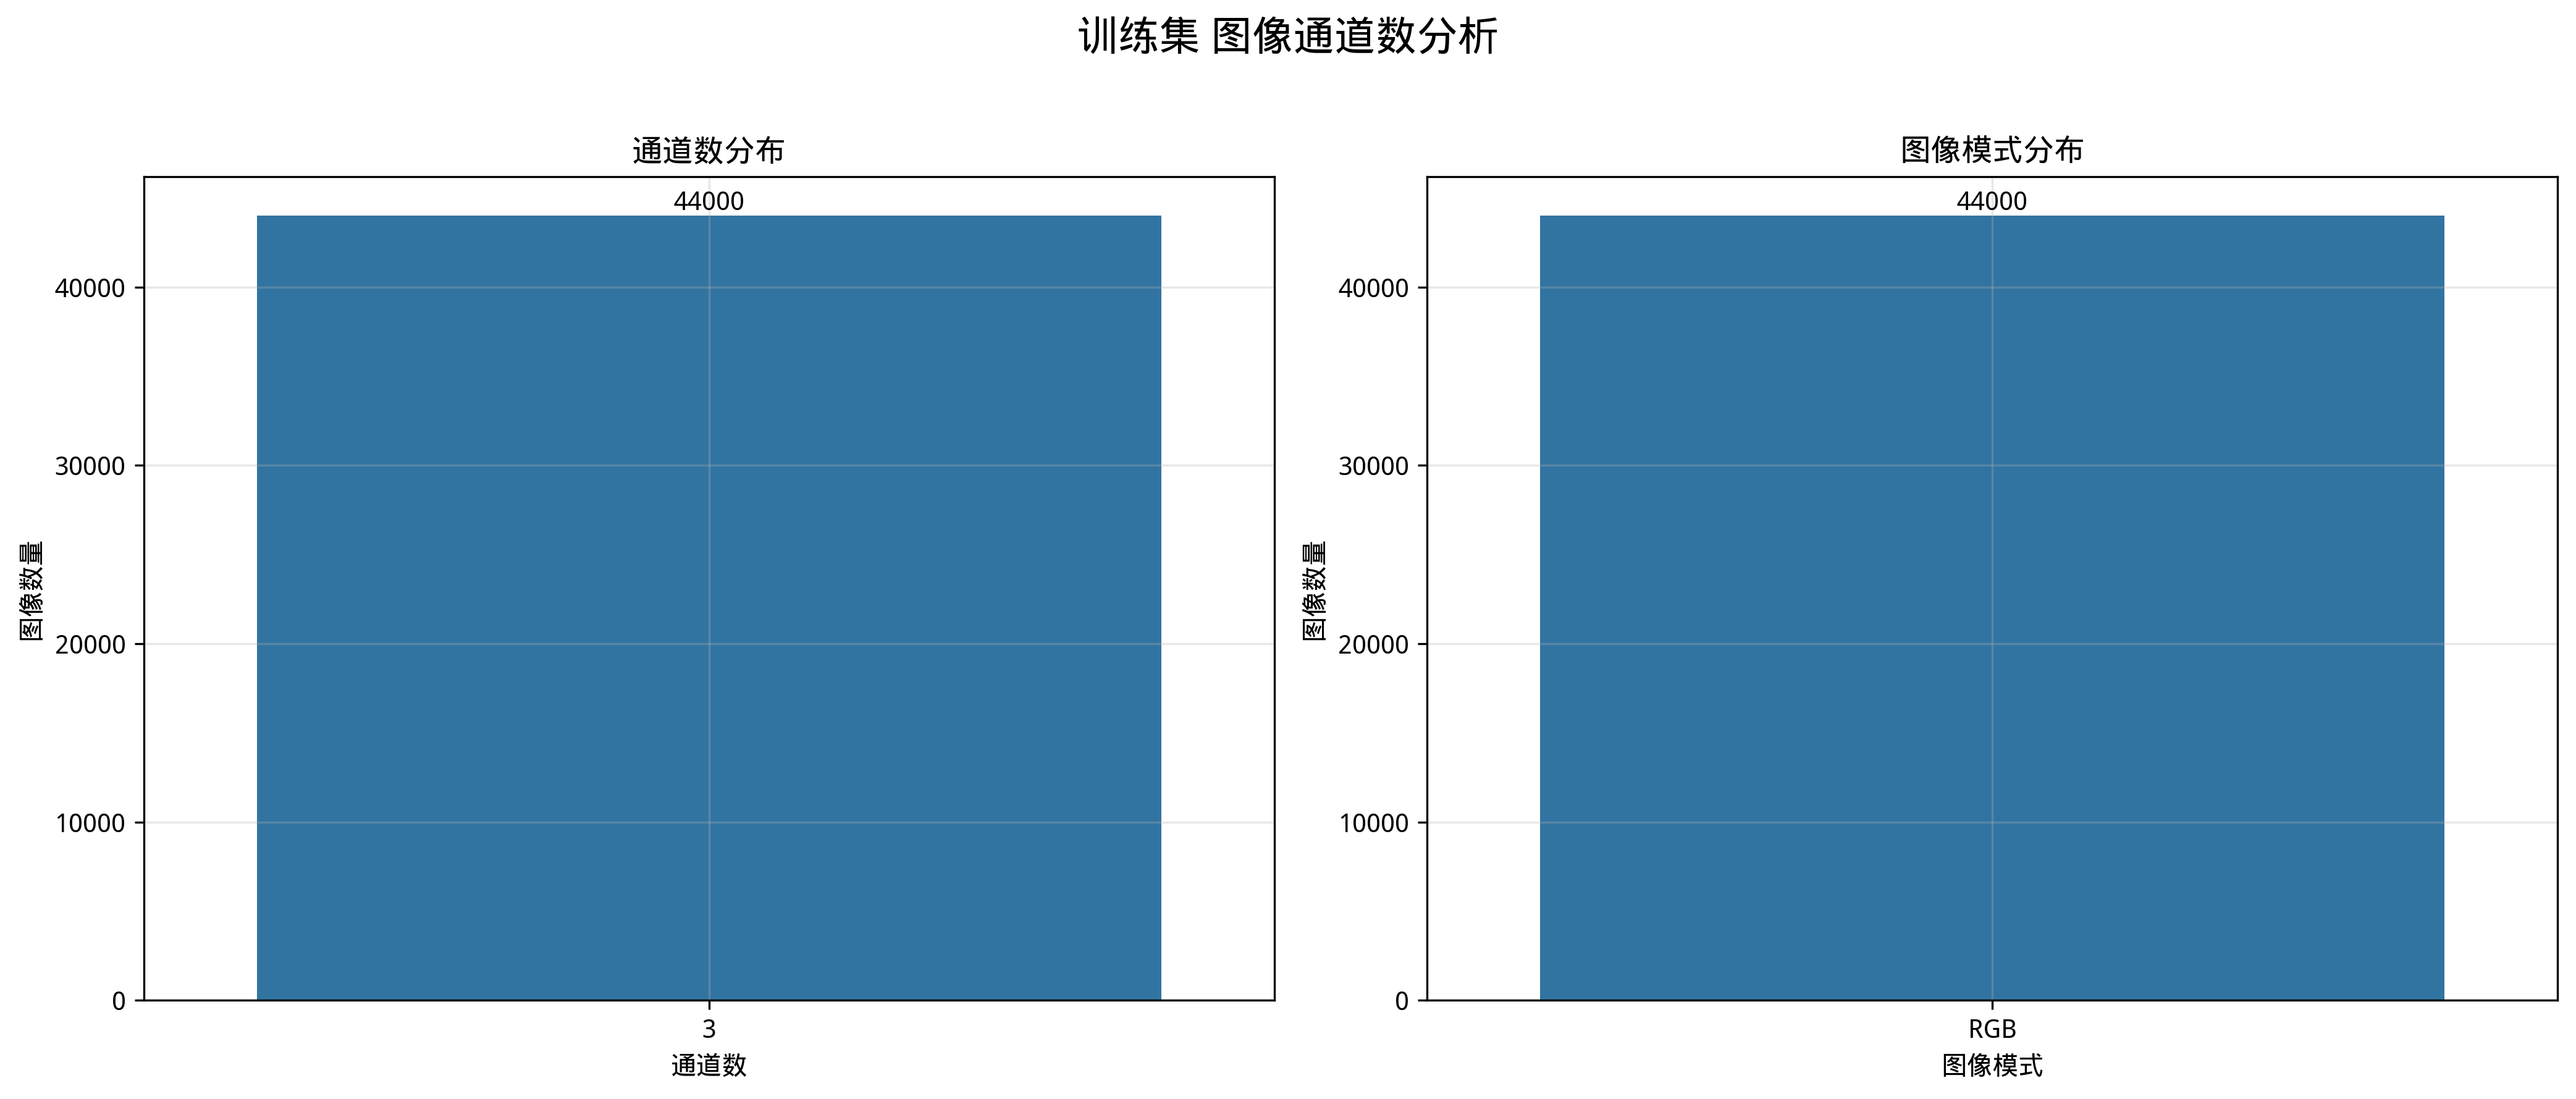


通道数统计:
 通道数  图像数量      占比
   3 44000 100.00%

图像模式统计:
图像模式  图像数量      占比
 RGB 44000 100.00%
测试集 图像数量: 11000
分析 测试集 中的图像通道数...


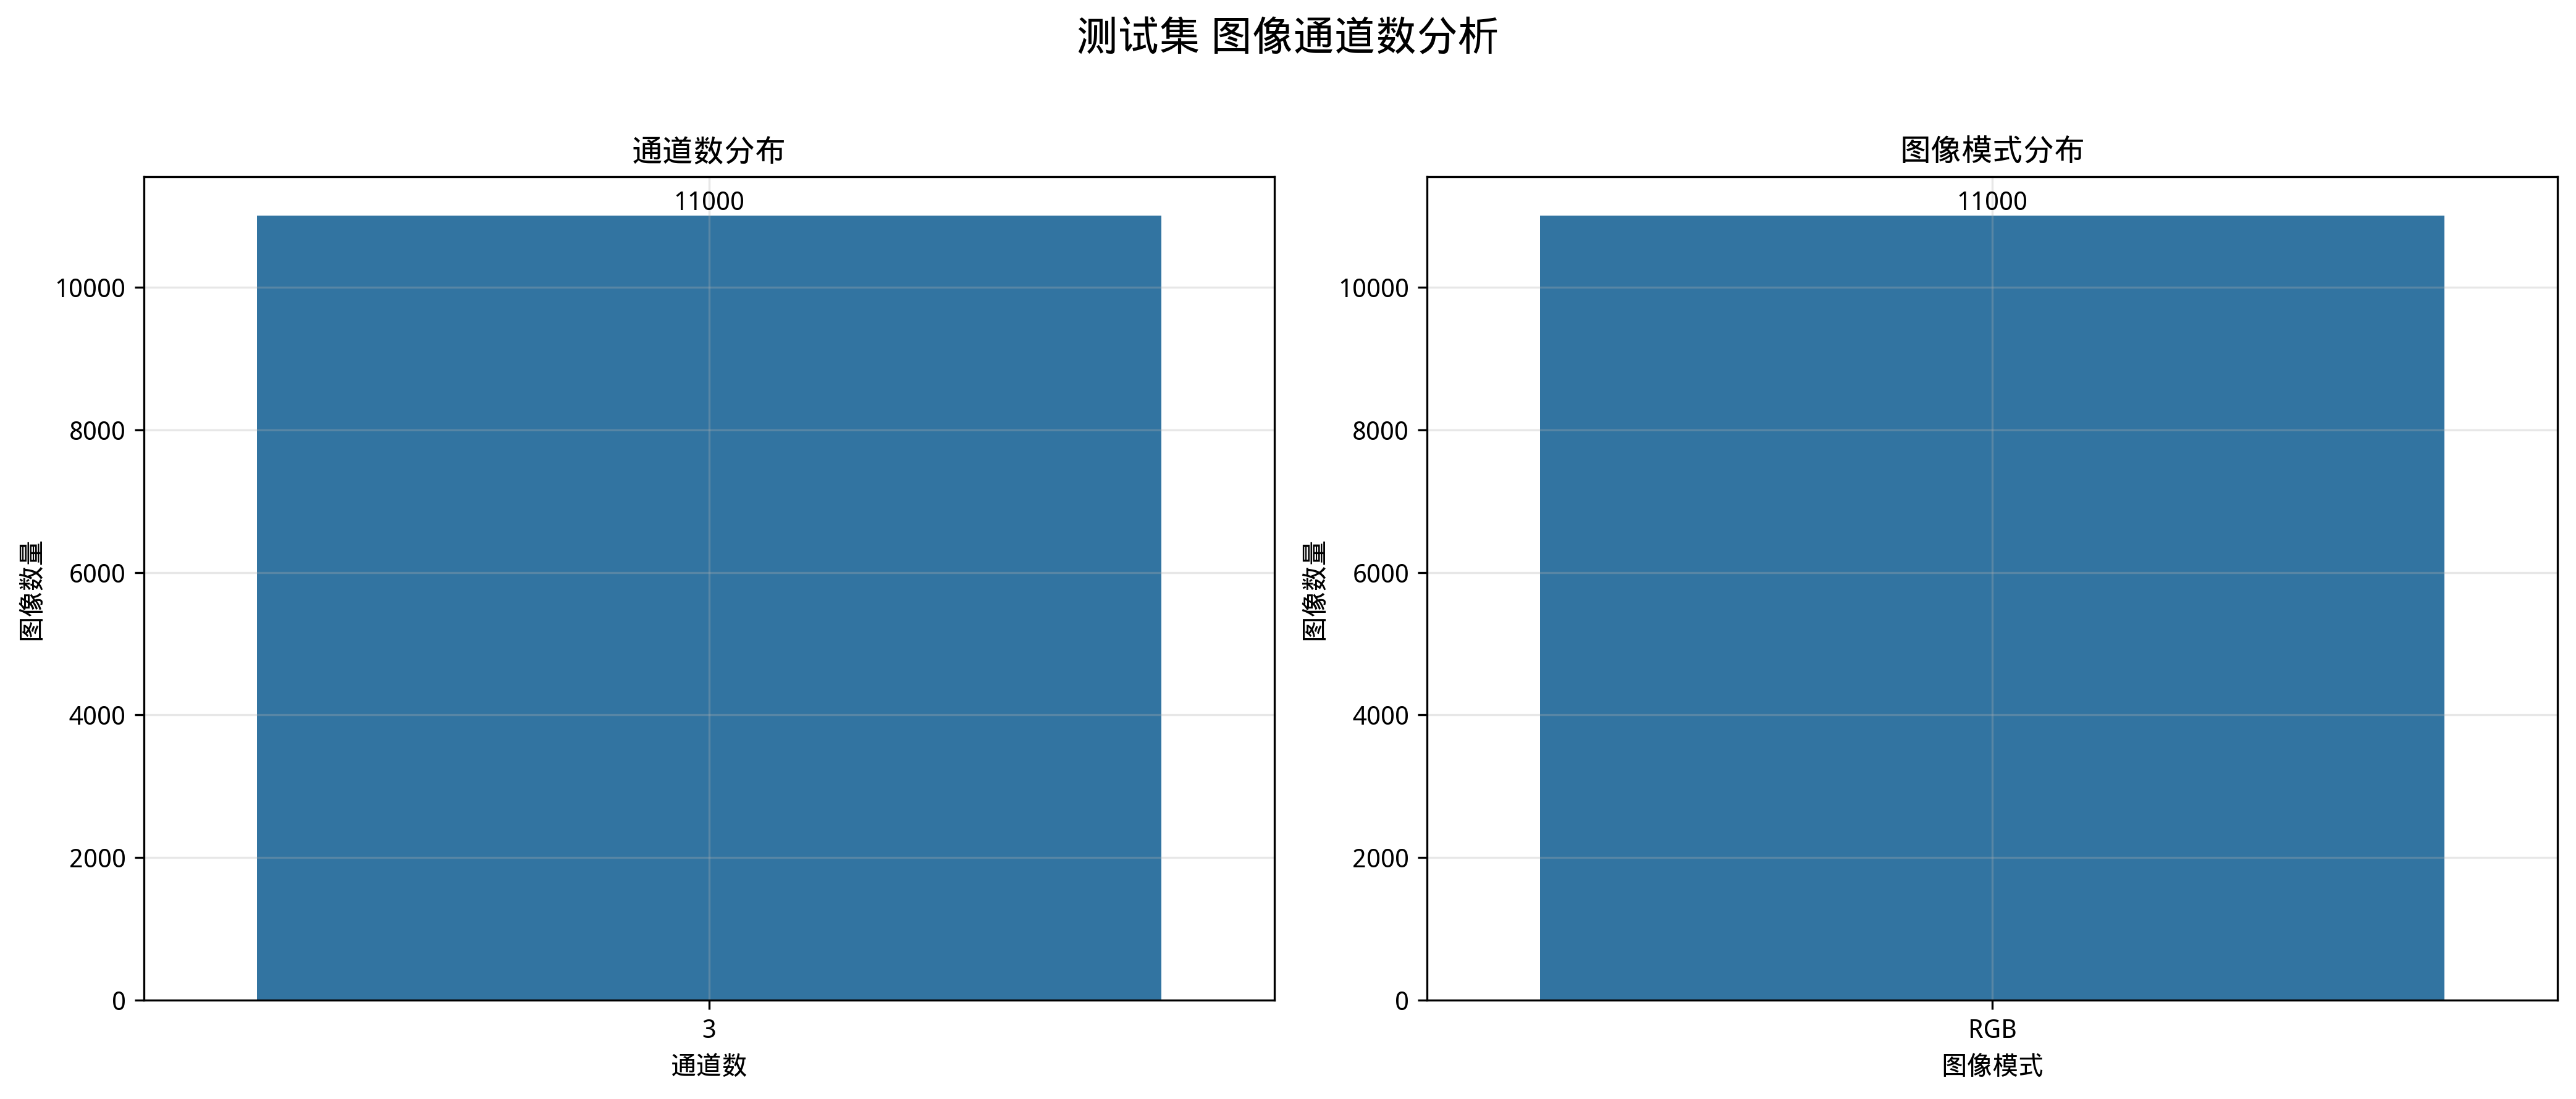


通道数统计:
 通道数  图像数量      占比
   3 11000 100.00%

图像模式统计:
图像模式  图像数量      占比
 RGB 11000 100.00%
测试外集 图像数量: 22000
分析 测试外集 中的图像通道数...


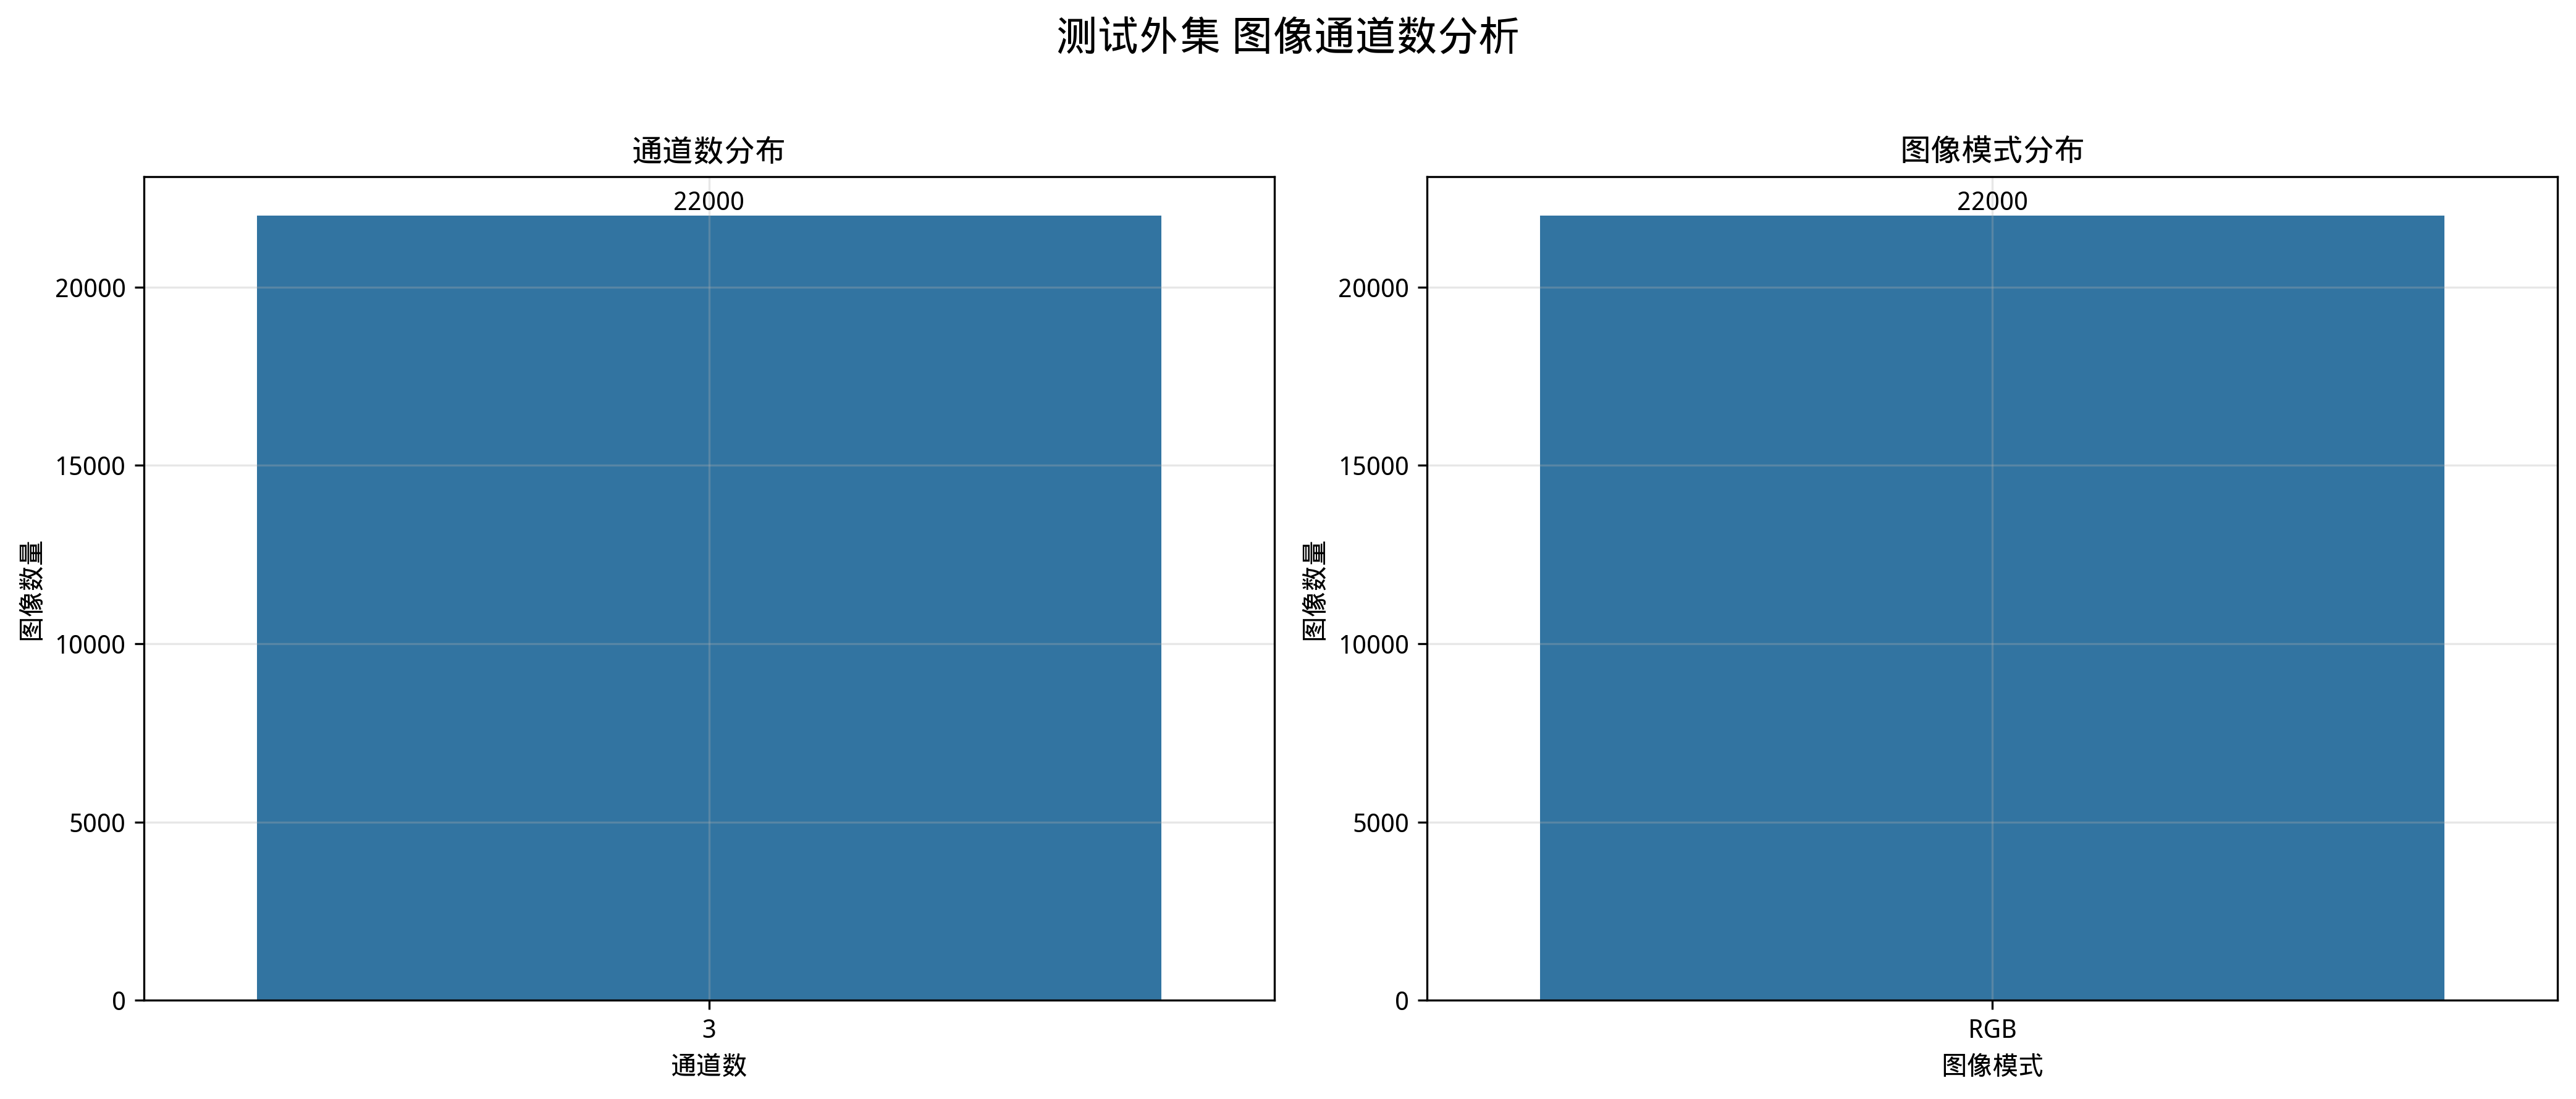


通道数统计:
 通道数  图像数量      占比
   3 22000 100.00%

图像模式统计:
图像模式  图像数量      占比
 RGB 22000 100.00%


In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

def read_image_paths(file_path):
    """读取txt文件中的图像路径"""
    if not os.path.exists(file_path):
        print(f"文件不存在: {file_path}")
        return []
    
    with open(file_path, 'r') as f:
        paths = [line.strip().split()[0] for line in f if line.strip()]
    return paths

def get_image_channels(image_path):
    """获取图像的通道数"""
    try:
        with Image.open(image_path) as img:
            # 获取图像模式
            mode = img.mode
            
            # 根据模式确定通道数
            if mode == 'L':  # 灰度图
                channels = 1
            elif mode == 'RGB':  # RGB彩色图
                channels = 3
            elif mode == 'RGBA':  # 带Alpha通道的RGB
                channels = 4
            elif mode == 'CMYK':  # CMYK色彩空间
                channels = 4
            elif mode == 'P':  # 8位调色板
                channels = 1  # 虽然是调色板，但本质是单通道
            else:
                channels = None  # 其他模式
            
            return mode, channels
    except Exception as e:
        print(f"无法读取图像 {image_path}: {e}")
        return None, None

def analyze_image_channels(dataset_name, paths):
    """分析图像通道数并返回统计数据"""
    print(f"分析 {dataset_name} 中的图像通道数...")
    
    channel_modes = []
    channel_counts = []
    
    total_images = len(paths)
    valid_images = 0
    
    for path in paths:
        if not os.path.exists(path):
            print(f"警告: 图像路径不存在 - {path}")
            continue
            
        mode, channels = get_image_channels(path)
        if mode and channels is not None:
            channel_modes.append(mode)
            channel_counts.append(channels)
            valid_images += 1
    
    if valid_images == 0:
        print(f"警告: {dataset_name} 中没有找到有效的图像")
        return None
    
    # 创建统计数据框
    data = {
        'channel_mode': channel_modes,
        'channel_count': channel_counts
    }
    df = pd.DataFrame(data)
    
    # 计算统计指标
    channel_stats = df['channel_count'].value_counts().reset_index()
    channel_stats.columns = ['通道数', '图像数量']
    channel_stats['占比'] = (channel_stats['图像数量'] / valid_images * 100).map('{:.2f}%'.format)
    
    # 按通道数排序
    channel_stats = channel_stats.sort_values('通道数')
    
    # 统计模式分布
    mode_stats = df['channel_mode'].value_counts().reset_index()
    mode_stats.columns = ['图像模式', '图像数量']
    mode_stats['占比'] = (mode_stats['图像数量'] / valid_images * 100).map('{:.2f}%'.format)
    
    stats = {
        'dataset': dataset_name,
        'total_images': total_images,
        'valid_images': valid_images,
        'channel_stats': channel_stats,
        'mode_stats': mode_stats
    }

    return df, stats

def plot_channel_distribution(df, dataset_name, stats):
    """绘制通道数分布图表"""
    # 设置图片清晰度和字体
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'WenQuanYi Zen Hei']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 创建1x2子图布局
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f'{dataset_name} 图像通道数分析', fontsize=16)
    
    # 1. 通道数分布柱状图
    ax = axes[0]
    sns.countplot(x='channel_count', data=df, ax=ax)
    ax.set_title('通道数分布')
    ax.set_xlabel('通道数')
    ax.set_ylabel('图像数量')
    ax.grid(True, alpha=0.3)
    
    # 标注数值
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
    # 2. 图像模式分布柱状图
    ax = axes[1]
    sns.countplot(x='channel_mode', data=df, ax=ax)
    ax.set_title('图像模式分布')
    ax.set_xlabel('图像模式')
    ax.set_ylabel('图像数量')
    ax.grid(True, alpha=0.3)
    
    # 标注数值
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
    # 调整布局
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 为suptitle留出空间
    plt.show()
    
    # 打印详细统计数据
    print("\n通道数统计:")
    print(stats['channel_stats'].to_string(index=False))
    
    print("\n图像模式统计:")
    print(stats['mode_stats'].to_string(index=False))

    
    
    
    
# 文件路径
data_dir = '/mnt/workspace/POSE/dataset/annotations/'
dataset_files = {
    '训练集': os.path.join(data_dir, 'train_list.txt'),
    '测试集': os.path.join(data_dir, 'test_list.txt'),
    '测试外集': os.path.join(data_dir, 'test_out_list.txt')
}

# 分析每个数据集
for dataset_name, file_path in dataset_files.items():
    paths = read_image_paths(file_path)
    print(f"{dataset_name} 图像数量: {len(paths)}")

    result = analyze_image_channels(dataset_name, paths)
    if result:
        df, stats = result
        plot_channel_distribution(df, dataset_name, stats)

# 像数值分析


=== 训练集 像素值分析 ===
图像数量: 44000
分析 训练集 的像素值统计特征...

【统计概览】
有效图像数: 44000
全局像素范围: 0.00 ~ 255.00
R通道均值 ± 方差: 137.29 ± 1008.56
G通道均值 ± 方差: 114.17 ± 955.99
B通道均值 ± 方差: 100.17 ± 1121.78


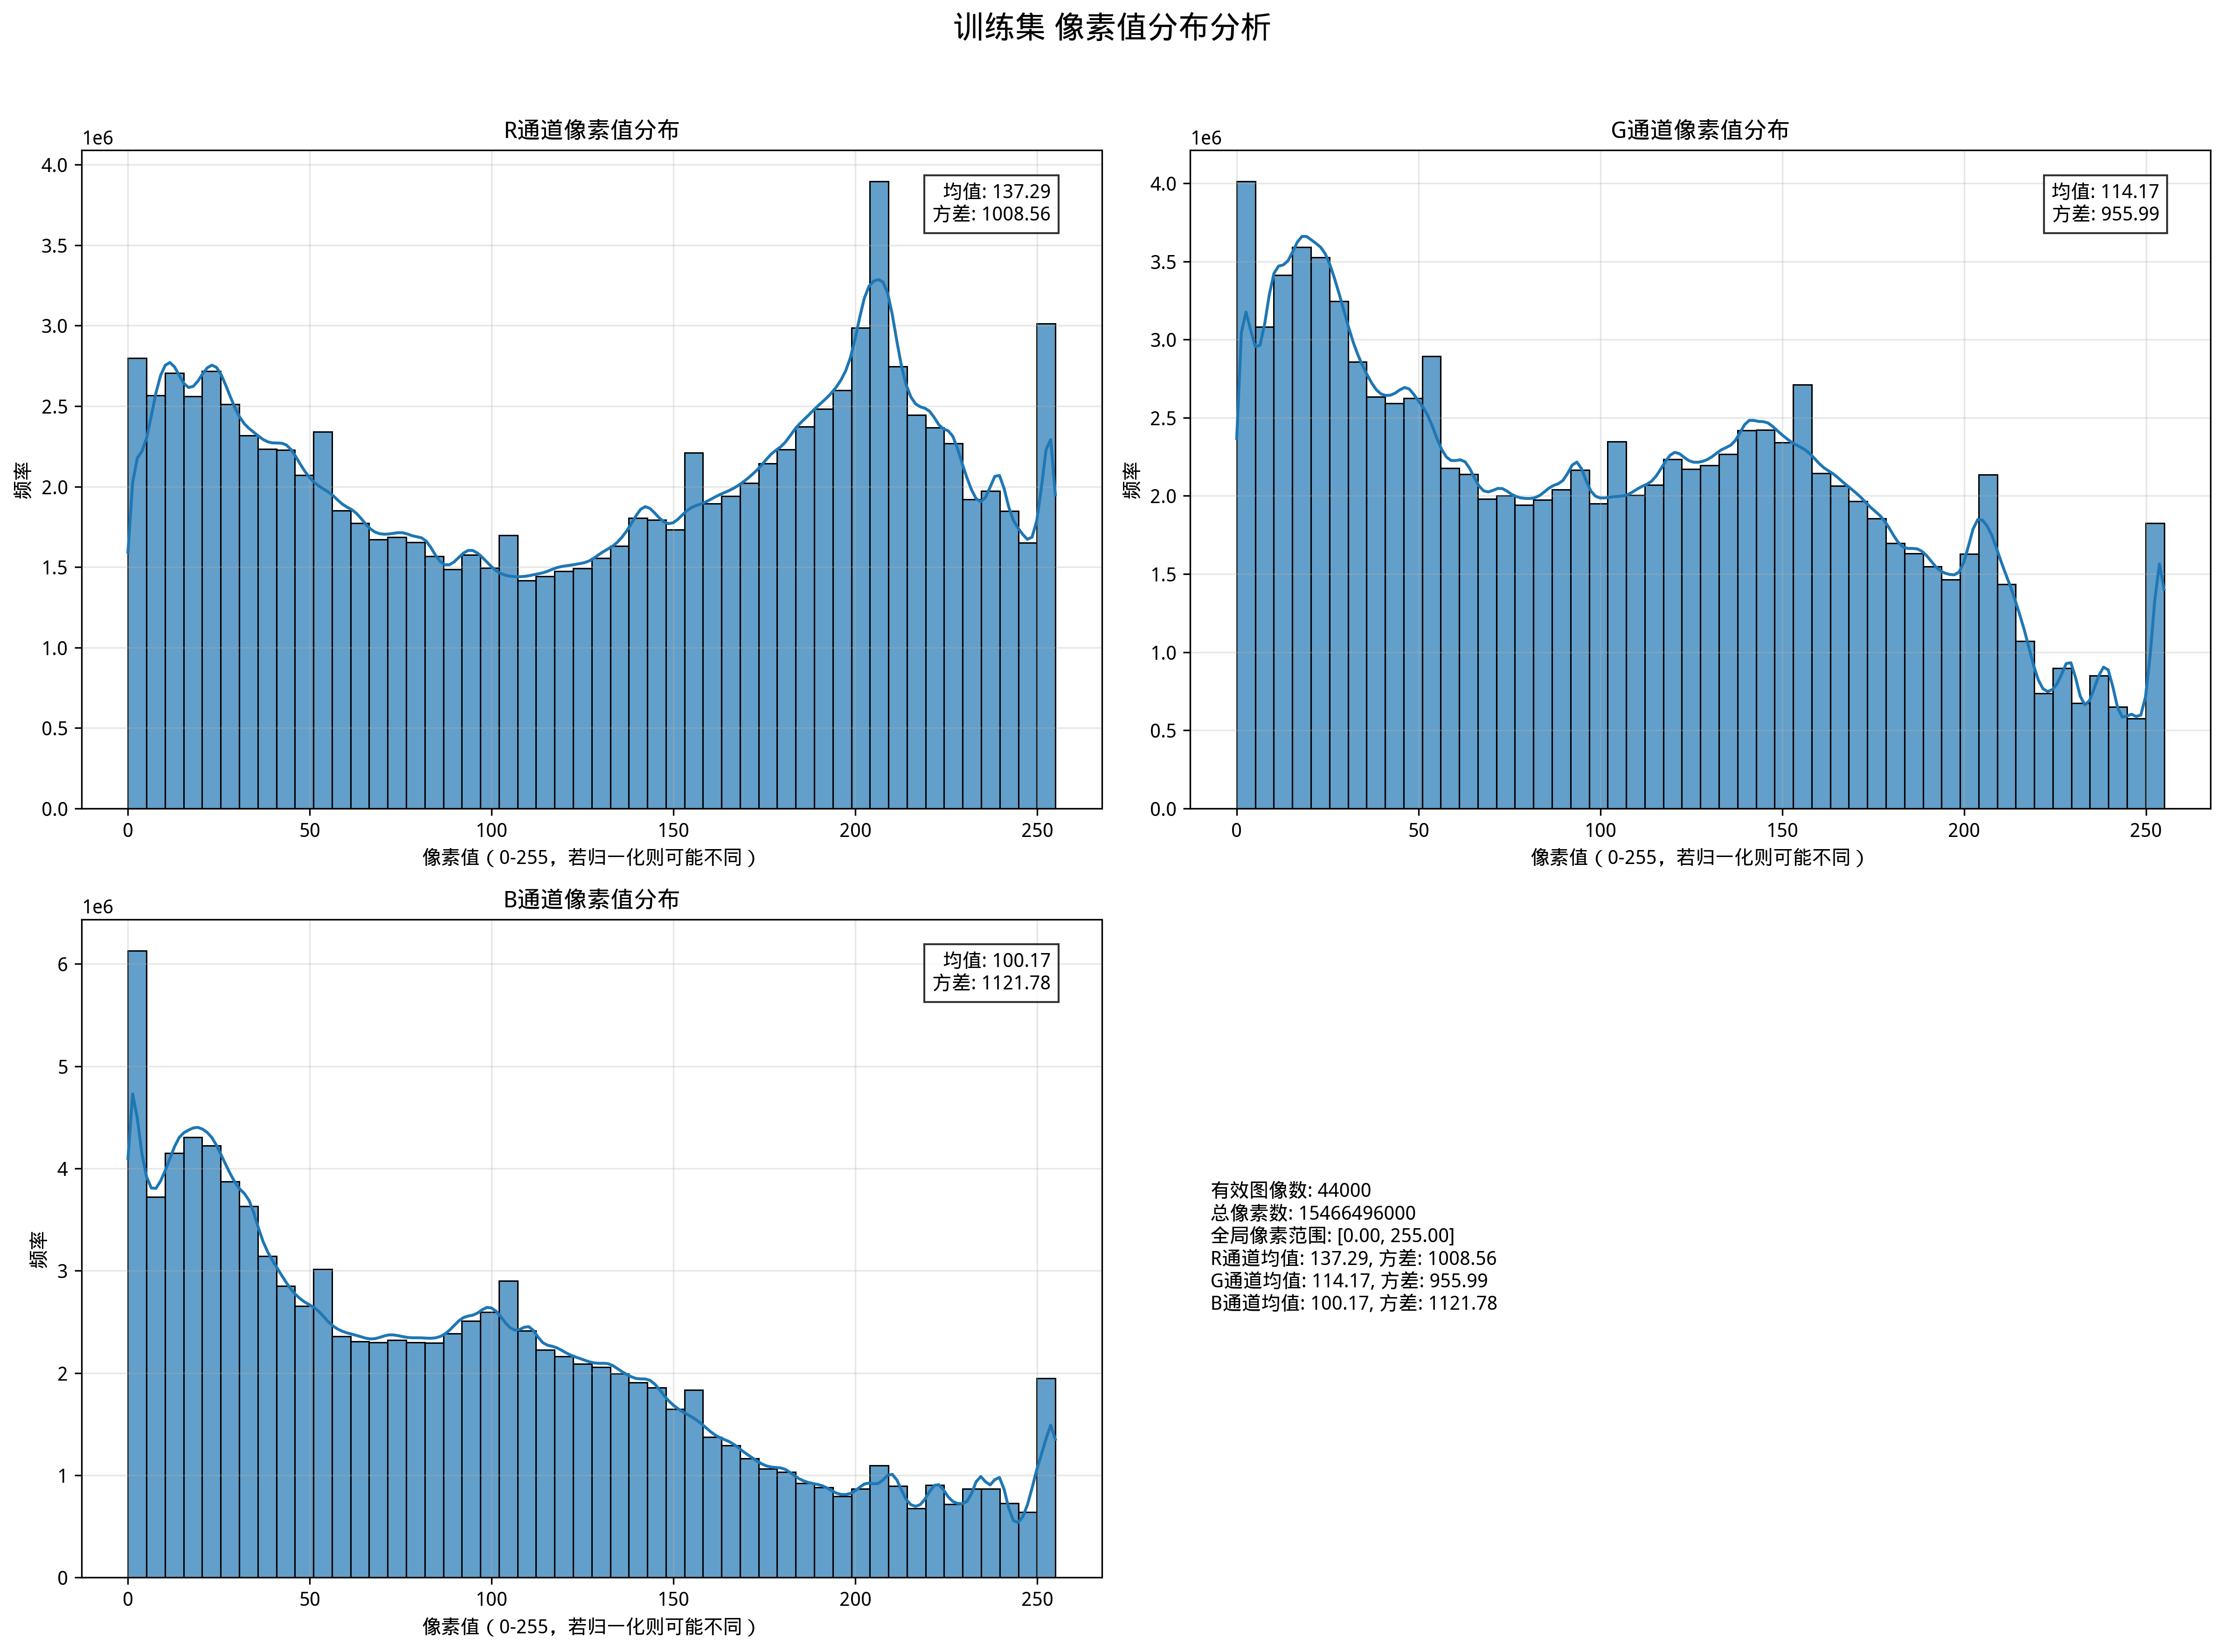


=== 测试集 像素值分析 ===
图像数量: 11000
分析 测试集 的像素值统计特征...

【统计概览】
有效图像数: 11000
全局像素范围: 0.00 ~ 255.00
R通道均值 ± 方差: 137.68 ± 997.21
G通道均值 ± 方差: 114.67 ± 961.99
B通道均值 ± 方差: 100.81 ± 1118.28


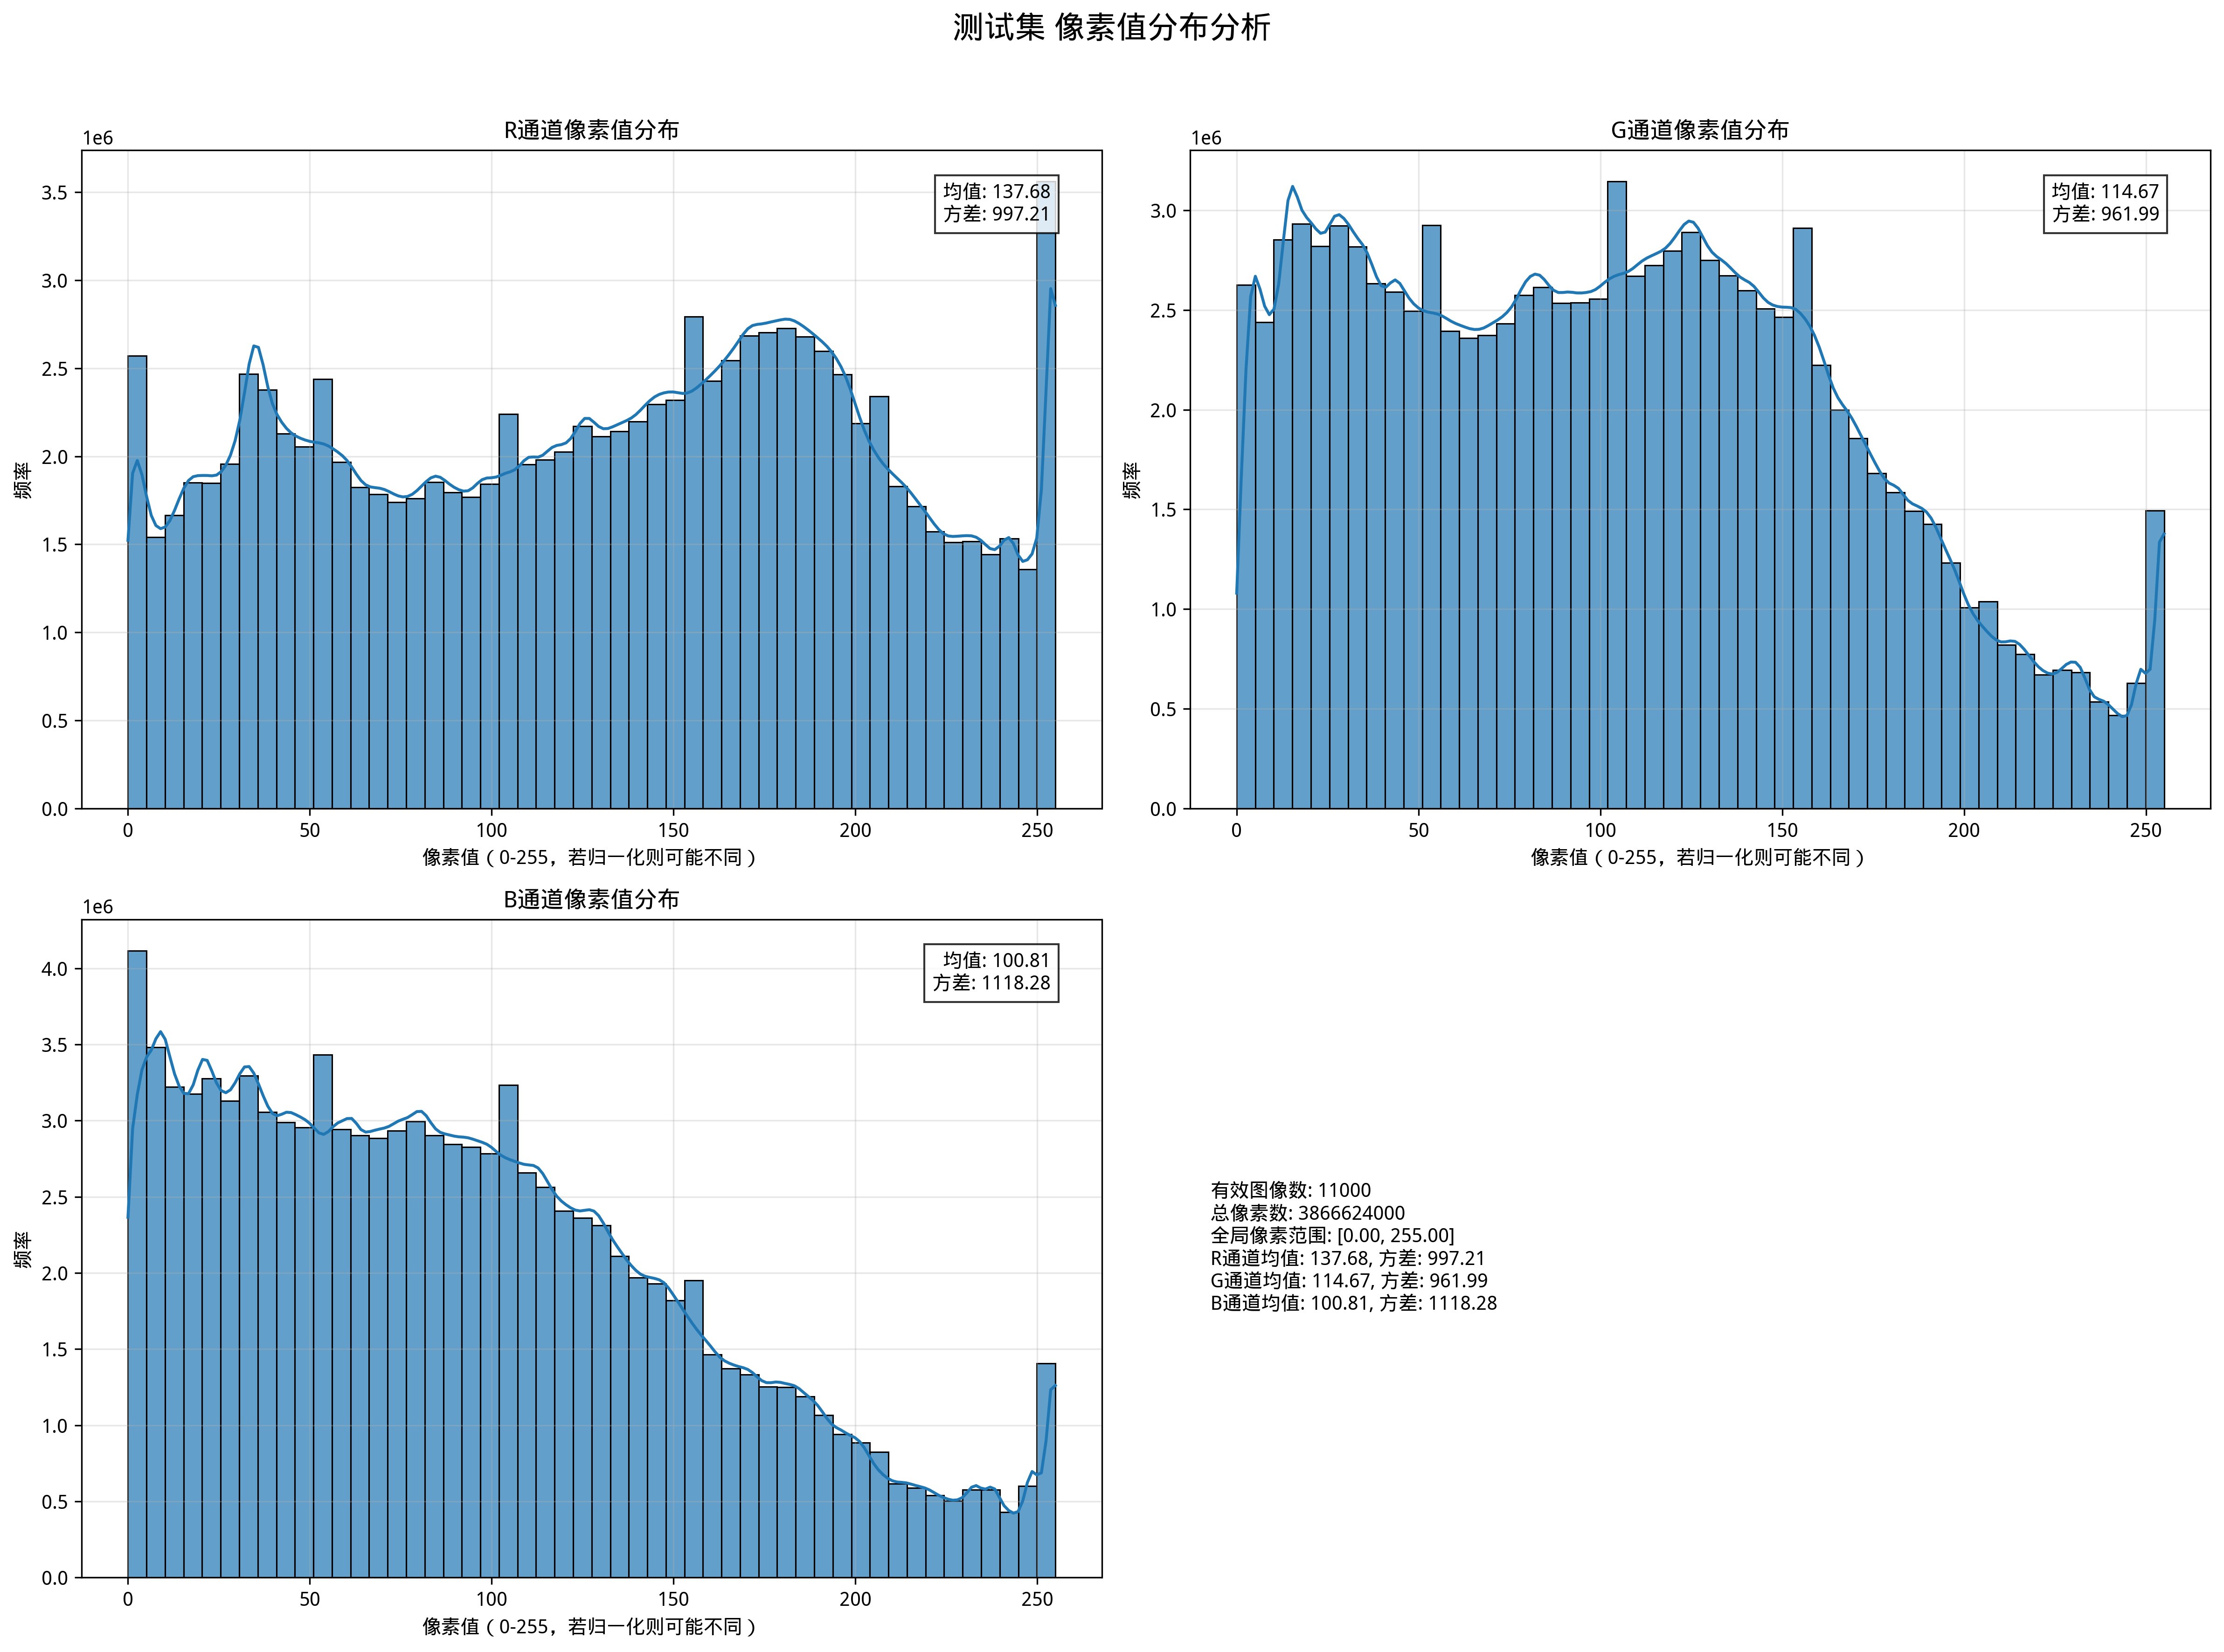


=== 测试外集 像素值分析 ===
图像数量: 22000
分析 测试外集 的像素值统计特征...

【统计概览】
有效图像数: 22000
全局像素范围: 0.00 ~ 255.00
R通道均值 ± 方差: 132.80 ± 1270.79
G通道均值 ± 方差: 111.65 ± 1116.36
B通道均值 ± 方差: 98.34 ± 1238.24


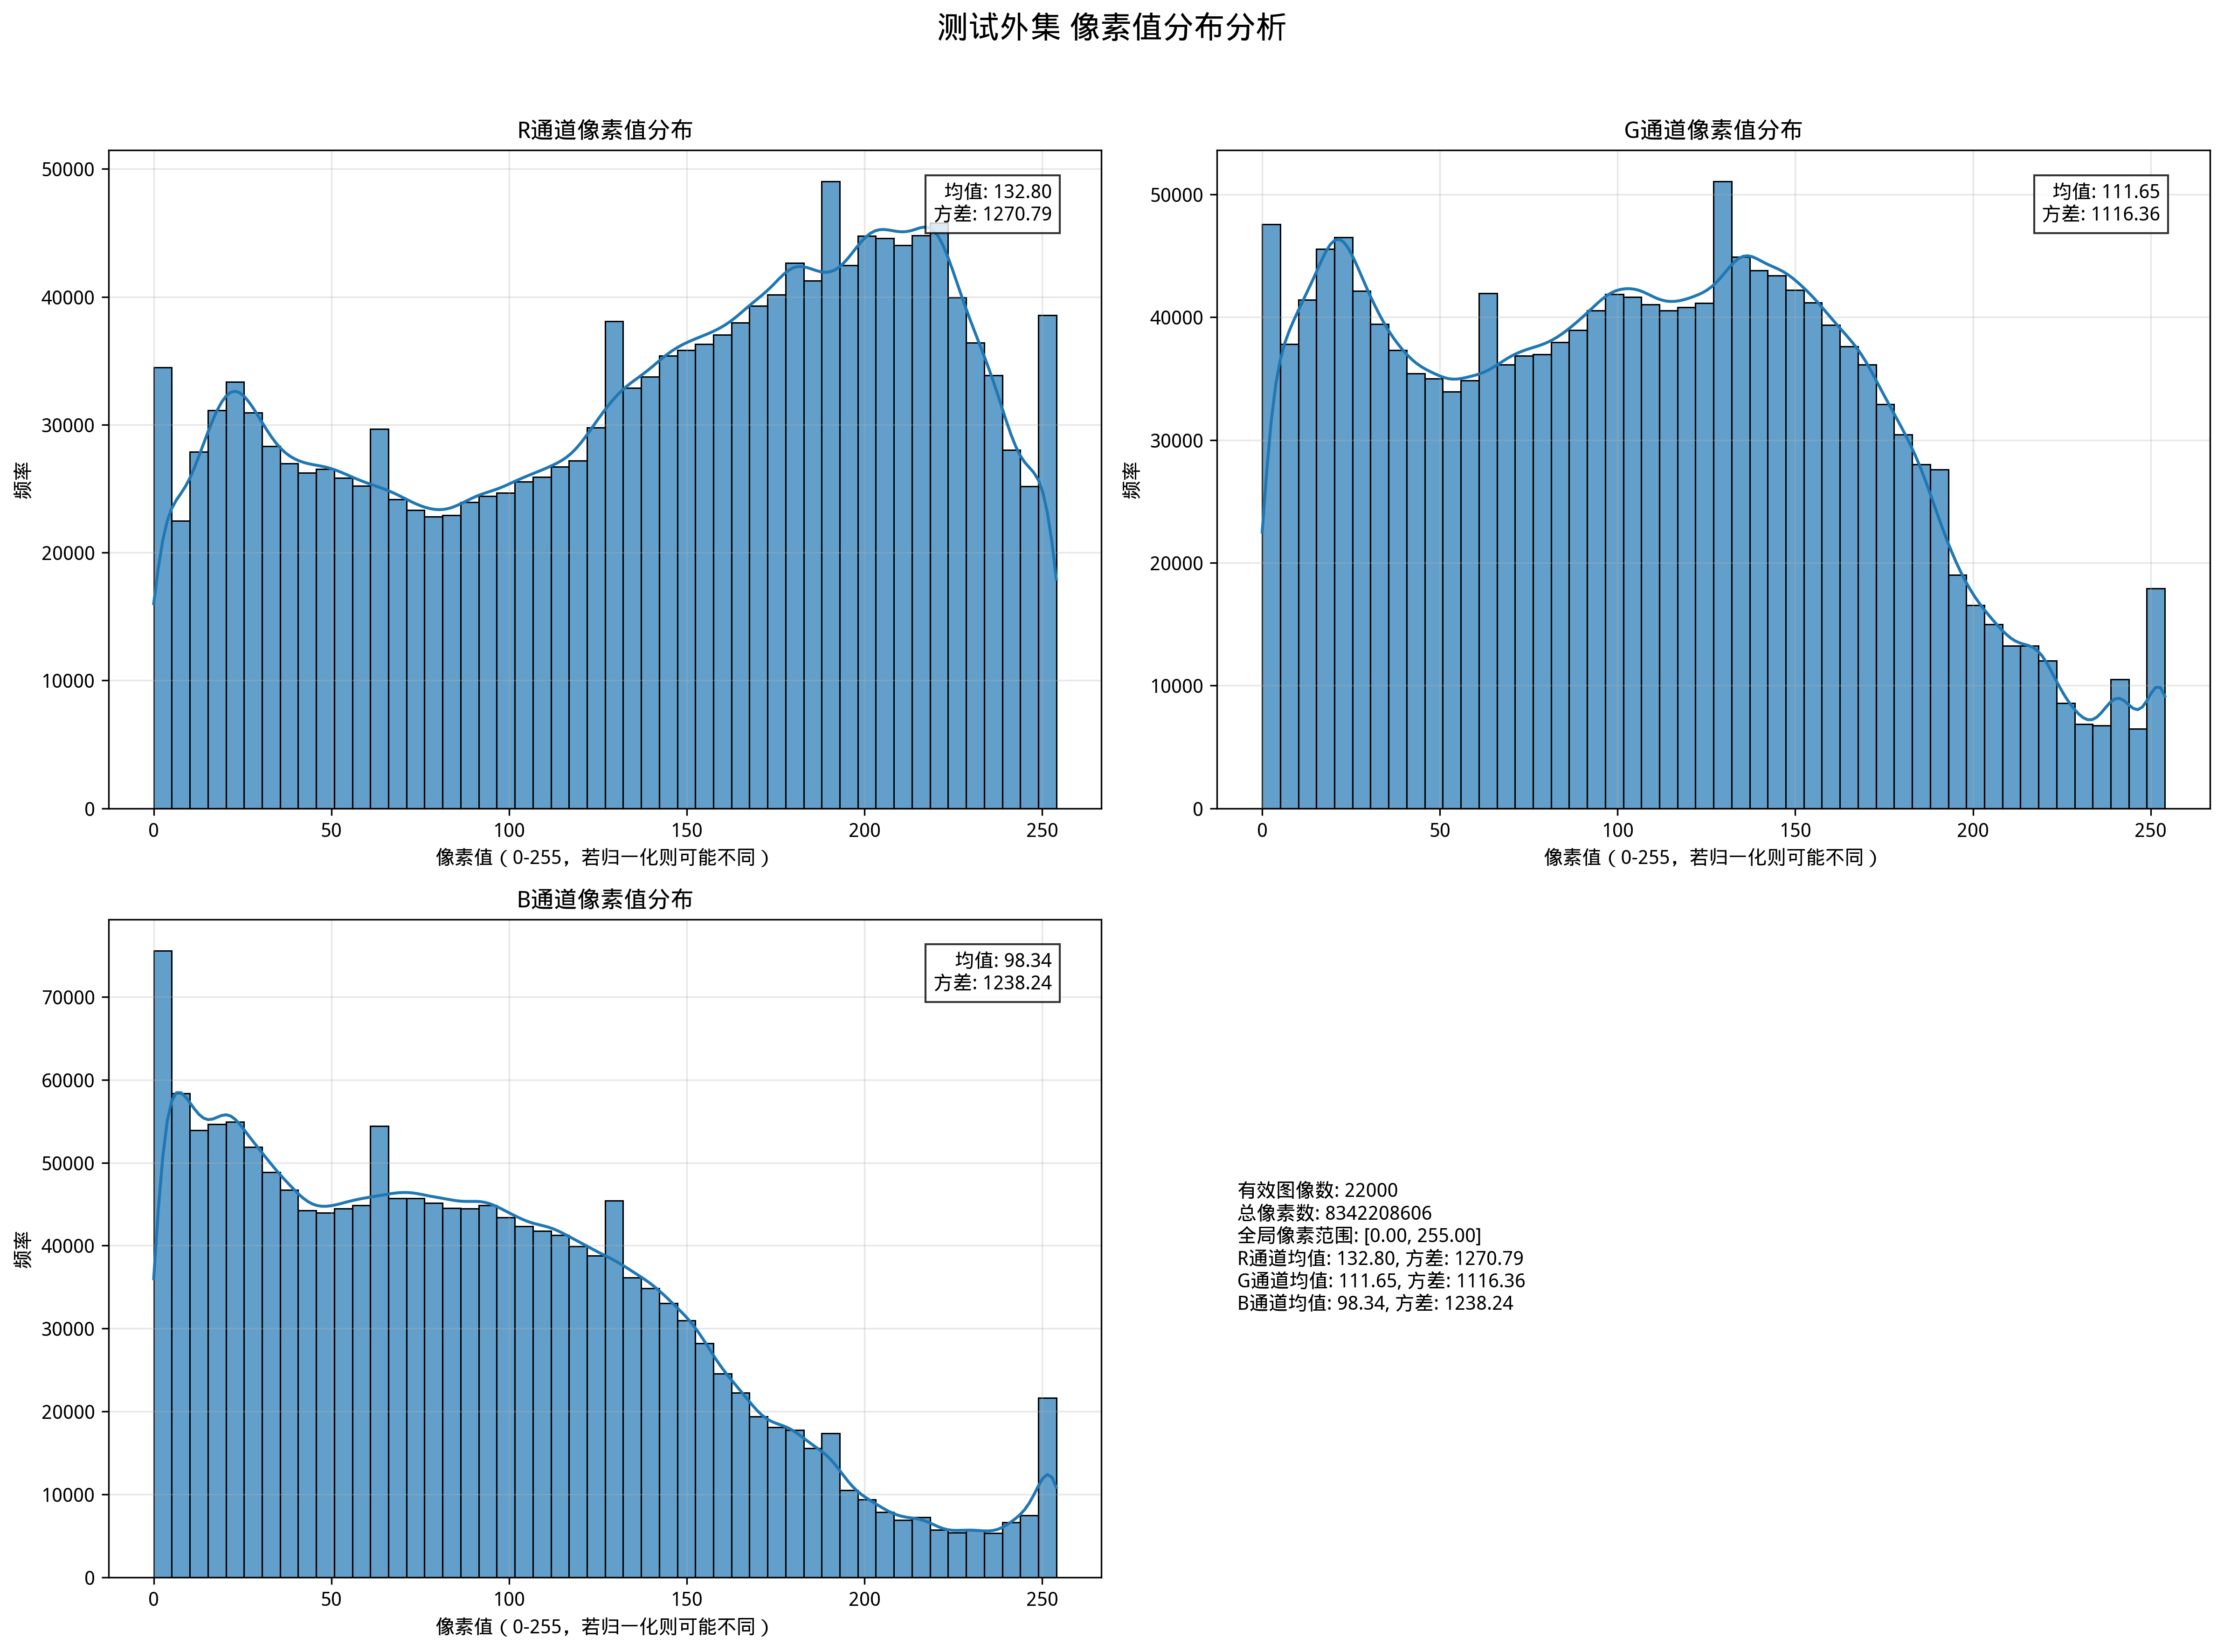

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

# 复用图像路径读取函数
def read_image_paths(file_path):
    if not os.path.exists(file_path):
        print(f"文件不存在: {file_path}")
        return []
    with open(file_path, 'r') as f:
        paths = [line.strip().split()[0] for line in f if line.strip()]
    return paths

def get_image_pixel_stats(image_path):
    """获取单张图像的像素统计（通道均值、方差、全局极值）
        像素坐标 (0,0): [10, 20, 30]  # R=10, G=20, B=30
        像素坐标 (0,1): [40, 50, 60]  # R=40, G=50, B=60
        像素坐标 (1,0): [70, 80, 90]  # R=70, G=80, B=90
        像素坐标 (1,1): [100, 110, 120]  # R=100, G=110, B=120
    """
    try:
        with Image.open(image_path) as img:
            img = img.convert('RGB')  # 统一转为RGB三通道
            pixels = np.array(img, dtype=np.float32)  # (H, W, 3)
            # pixels = np.array([
            #     [[10, 20, 30], [40, 50, 60]],
            #     [[70, 80, 90], [100, 110, 120]]
            # ], dtype=np.float32)
            
            h, w, c = pixels.shape
            total_pixels = h * w
            # h, w, c = 2, 2, 3
            # total_pixels = 2 * 2 = 4

            # 通道均值（每个通道的均值）
            channel_means = np.mean(pixels, axis=(0, 1))  # (3,)：R, G, B
            # 红色通道(R)均值: (10 + 40 + 70 + 100)/4 = 220/4 = 55.0
            # 绿色通道(G)均值: (20 + 50 + 80 + 110)/4 = 260/4 = 65.0
            # 蓝色通道(B)均值: (30 + 60 + 90 + 120)/4 = 300/4 = 75.0
            # channel_means = np.array([55.0, 65.0, 75.0])
  
            
            # 通道方差（无偏，基于Welford算法的中间步骤）
            dev = pixels - channel_means
            channel_vars_sum = np.sum(dev**2, axis=(0, 1))  # 偏差平方和

            # 计算每个像素与通道均值的偏差
            # dev = pixels - channel_means

            # 偏差矩阵：
            # [ [ [10-55, 20-65, 30-75], [40-55, 50-65, 60-75] ],
            #   [ [70-55, 80-65, 90-75], [100-55, 110-65, 120-75] ] ]
            # = [ [ [-45, -45, -45], [-15, -15, -15] ],
            #     [ [15, 15, 15], [45, 45, 45] ] ]

            # 计算偏差平方：
            # dev_sq = dev**2
            # = [ [ [2025, 2025, 2025], [225, 225, 225] ],
            #     [ [225, 225, 225], [2025, 2025, 2025] ] ]

            # 计算每个通道的偏差平方和：
            # channel_vars_sum = np.sum(dev_sq, axis=(0, 1))
            # R: 2025 + 225 + 225 + 2025 = 4500
            # G: 2025 + 225 + 225 + 2025 = 4500
            # B: 2025 + 225 + 225 + 2025 = 4500
            # = [4500.0, 4500.0, 4500.0]
            
            
            
            
            # 全局极值
            global_min = np.min(pixels)
            global_max = np.max(pixels)
            # global_min = np.min(pixels)  # 最小值 = 10
            # global_max = np.max(pixels)  # 最大值 = 120

            return channel_means, channel_vars_sum, global_min, global_max, total_pixels
        # 返回 该图片的每个通道的像素均值、每个通道的均方平方和、全局最小值最大值、总像素数
    except Exception as e:
        print(f"无法读取图像 {image_path}: {e}")
        return None, None, None, None, 0

def analyze_pixel_values(dataset_name, paths):
    """聚合所有图像的像素统计（Welford算法优化内存）"""
    print(f"分析 {dataset_name} 的像素值统计特征...")
    
    # 初始化统计量（Welford算法：mean = sum/n, var = M2/(n-1)）
    channel_means = np.zeros(3)  # R, G, B 通道均值
    channel_M2 = np.zeros(3)     # 偏差平方和的累计（用于计算方差）
    global_min = 255.0           # 初始设为最大值（uint8范围）
    global_max = 0.0             # 初始设为最小值
    valid_images = 0             # 有效图像数
    total_pixels = 0             # 总像素数

    for path in paths:
        if not os.path.exists(path):
            print(f"警告: 图像路径不存在 - {path}")
            continue
        
        ch_means, ch_vars_sum, img_min, img_max, img_pixels = get_image_pixel_stats(path)
        if ch_means is None:
            continue
        
        valid_images += 1
        total_pixels += img_pixels

        # 更新全局极值
        if img_min < global_min:
            global_min = img_min
        if img_max > global_max:
            global_max = img_max

        # 在线更新通道均值和M2（Welford算法）
        for c in range(3):
            old_mean = channel_means[c]
            # 计算新均值
            new_mean = old_mean + (ch_means[c] - old_mean) / valid_images
            # 计算M2（累计偏差平方和）
            channel_M2[c] += (ch_means[c] - old_mean) * (ch_means[c] - new_mean)
            # 更新均值
            channel_means[c] = new_mean

    if valid_images == 0:
        print(f"警告: {dataset_name} 中没有找到有效的图像")
        return None

    # 计算通道方差（无偏：除以n-1）
    channel_vars = channel_M2 / (valid_images - 1) if valid_images > 1 else np.zeros(3)

    # 整理统计结果
    stats = {
        'dataset': dataset_name,
        'valid_images': valid_images,
        'total_pixels': total_pixels,
        'channel_means': channel_means,  # [R_mean, G_mean, B_mean]
        'channel_vars': channel_vars,    # [R_var, G_var, B_var]
        'global_min': global_min,
        'global_max': global_max
    }

    return stats

def plot_pixel_distribution(stats, dataset_name, sample_paths, num_samples=100):
    """抽样绘制RGB通道的像素值分布直方图"""
    # 抽样获取像素数据（避免内存爆炸）
    sample_pixels = []
    for path in sample_paths[:num_samples]:
        try:
            with Image.open(path) as img:
                img = img.convert('RGB')
                pixels = np.array(img, dtype=np.float32).reshape(-1, 3)  # 展平为(N, 3)
                sample_pixels.append(pixels)
        except Exception as e:
            continue
    if not sample_pixels:
        print("抽样失败，无法绘制直方图")
        return
    
    sample_pixels = np.concatenate(sample_pixels, axis=0)
    r = sample_pixels[:, 0]
    g = sample_pixels[:, 1]
    b = sample_pixels[:, 2]

    # 绘图设置
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'WenQuanYi Zen Hei']
    plt.rcParams['axes.unicode_minus'] = False

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{dataset_name} 像素值分布分析', fontsize=16)

    # 1. 各通道直方图
    for i, (channel, data) in enumerate(zip(['R', 'G', 'B'], [r, g, b])):
        ax = axes[i//2, i%2]
        sns.histplot(data, bins=50, kde=True, alpha=0.7, ax=ax)
        ax.set_title(f'{channel}通道像素值分布')
        ax.set_xlabel('像素值（0-255，若归一化则可能不同）')
        ax.set_ylabel('频率')
        ax.grid(True, alpha=0.3)

        # 标注均值和方差
        mean = stats['channel_means'][i]
        var = stats['channel_vars'][i]
        ax.text(
            0.95, 0.95, 
            f'均值: {mean:.2f}\n方差: {var:.2f}', 
            transform=ax.transAxes, ha='right', va='top', 
            bbox=dict(facecolor='white', alpha=0.8)
        )

    # 2. 全局统计信息展示
    ax = axes[1, 1]
    ax.axis('off')
    stats_text = f'''
    有效图像数: {stats['valid_images']}
    总像素数: {stats['total_pixels']}
    全局像素范围: [{stats['global_min']:.2f}, {stats['global_max']:.2f}]
    R通道均值: {stats['channel_means'][0]:.2f}, 方差: {stats['channel_vars'][0]:.2f}
    G通道均值: {stats['channel_means'][1]:.2f}, 方差: {stats['channel_vars'][1]:.2f}
    B通道均值: {stats['channel_means'][2]:.2f}, 方差: {stats['channel_vars'][2]:.2f}
    '''
    ax.text(0, 0.5, stats_text, ha='left', va='center', fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# ---------------------- 主程序 ---------------------- #
data_dir = '/mnt/workspace/POSE/dataset/annotations/'
dataset_files = {
    '训练集': os.path.join(data_dir, 'train_list.txt'),
    '测试集': os.path.join(data_dir, 'test_list.txt'),
    '测试外集': os.path.join(data_dir, 'test_out_list.txt')
}

for dataset_name, file_path in dataset_files.items():
    paths = read_image_paths(file_path)
    print(f"\n=== {dataset_name} 像素值分析 ===")
    print(f"图像数量: {len(paths)}")

    stats = analyze_pixel_values(dataset_name, paths)
    if stats:
        # 打印统计结果
        print("\n【统计概览】")
        print(f"有效图像数: {stats['valid_images']}")
        print(f"全局像素范围: {stats['global_min']:.2f} ~ {stats['global_max']:.2f}")
        print(f"R通道均值 ± 方差: {stats['channel_means'][0]:.2f} ± {stats['channel_vars'][0]:.2f}")
        print(f"G通道均值 ± 方差: {stats['channel_means'][1]:.2f} ± {stats['channel_vars'][1]:.2f}")
        print(f"B通道均值 ± 方差: {stats['channel_means'][2]:.2f} ± {stats['channel_vars'][2]:.2f}")

        # 绘制分布直方图
        plot_pixel_distribution(stats, dataset_name, paths)

# 图片模糊度分析

总图像数量: 44000
开始计算图像模糊度...


/tmp/ipykernel_826/681521939.py:100: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = ax.boxplot(data, labels=labels, patch_artist=True, vert=False)


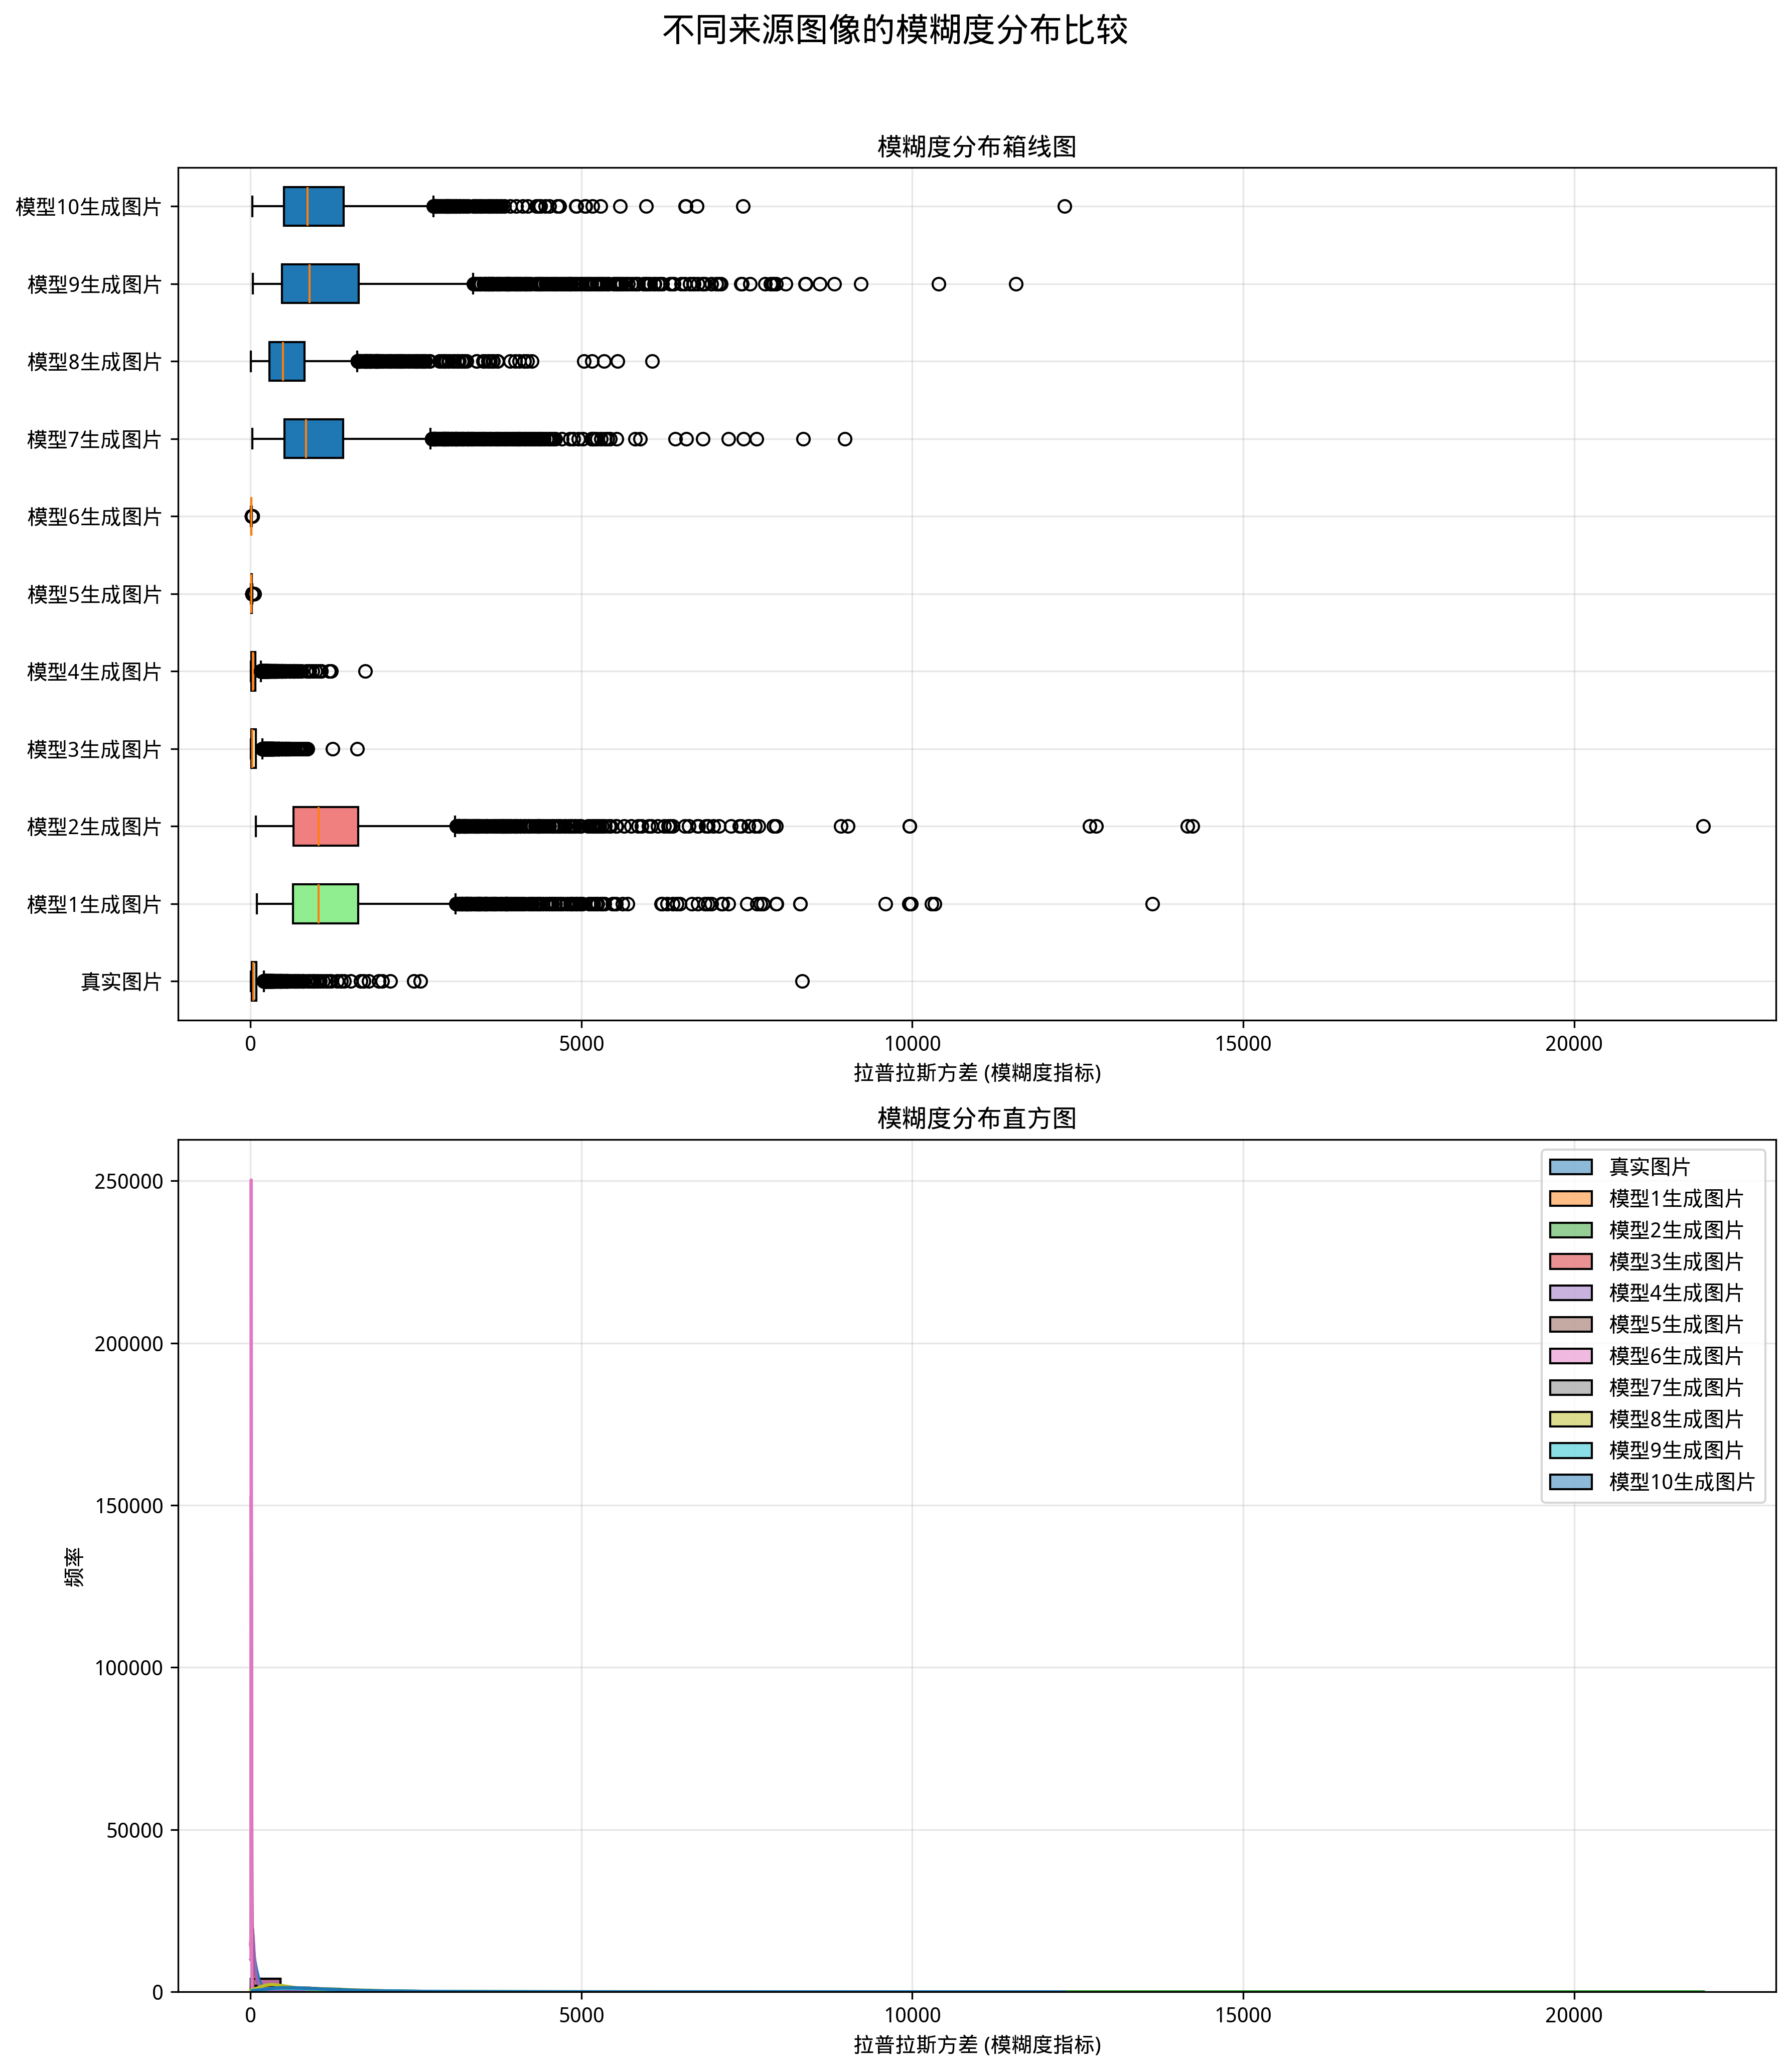


模糊度统计结果:
标签        样本数       均值          中位数         标准差         最小值         最大值         
真实图片      4000      89.7116     39.8987     203.1973    4.9669      8334.7588   
模型1生成图片   4000      1298.5155   1028.1299   1038.3969   95.1891     13627.4912  
模型2生成图片   4000      1339.8049   1026.1135   1162.3857   80.6516     21953.0684  
模型3生成图片   4000      73.8795     31.5718     105.9199    3.3347      1614.8208   
模型4生成图片   4000      67.9724     33.1244     104.3230    3.1292      1730.0344   
模型5生成图片   4000      15.0938     13.8005     5.9747      5.7329      59.4136     
模型6生成图片   4000      12.5477     12.0427     3.0159      6.9067      26.2831     
模型7生成图片   4000      1098.3710   842.2860    892.8596    28.6444     8980.1172   
模型8生成图片   4000      646.1597    490.4943    560.6146    3.0425      6069.0396   
模型9生成图片   4000      1272.8895   893.3872    1204.0074   33.4342     11568.7334  
模型10生成图片  4000      1070.3778   859.9130    804.5732    25.6428     12297.9102  


In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import seaborn as sns
from scipy import ndimage

def read_image_paths_with_labels(file_path):
    """读取txt文件中的图像路径和标签"""
    if not os.path.exists(file_path):
        print(f"文件不存在: {file_path}")
        return []
    
    with open(file_path, 'r') as f:
        lines = [line.strip().split() for line in f if line.strip()]
    
    # 提取路径和标签
    paths = [line[0] for line in lines]
    labels = [int(line[1]) for line in lines]
    
    return paths, labels

def calculate_blur(image_path):
    """使用拉普拉斯算子计算图像模糊度"""
    try:
        with Image.open(image_path) as img:
            # 转换为灰度图
            img_gray = img.convert('L')
            # 转换为numpy数组
            img_array = np.array(img_gray, dtype=np.float32)
            # 应用拉普拉斯算子
            laplacian_var = ndimage.laplace(img_array).var()
            return laplacian_var
    except Exception as e:
        print(f"无法处理图像 {image_path}: {e}")
        return None

def analyze_blur_distribution(paths, labels):
    """分析不同标签图像的模糊度分布"""
    print("开始计算图像模糊度...")
    
    # 存储每个标签的模糊度值
    blur_values = {}
    
    for path, label in zip(paths, labels):
        if not os.path.exists(path):
            print(f"警告: 图像路径不存在 - {path}")
            continue
            
        blur = calculate_blur(path)
        if blur is not None:
            if label not in blur_values:
                blur_values[label] = []
            blur_values[label].append(blur)
    
    # 计算统计信息
    stats = {}
    for label, values in blur_values.items():
        stats[label] = {
            'count': len(values),
            'mean': np.mean(values),
            'median': np.median(values),
            'std': np.std(values),
            'min': np.min(values),
            'max': np.max(values),
            '25th_percentile': np.percentile(values, 25),
            '75th_percentile': np.percentile(values, 75)
        }
    
    return blur_values, stats

def plot_blur_distribution(blur_values, stats):
    """绘制不同标签图像的模糊度分布"""
    # 设置图片清晰度和字体
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'WenQuanYi Zen Hei']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 创建标签名称映射
    label_names = {0: '真实图片'}
    for label in blur_values.keys():
        if label != 0:
            label_names[label] = f'模型{label}生成图片'
    
    # 创建2x1子图布局
    fig, axes = plt.subplots(2, 1, figsize=(12, 14))
    fig.suptitle('不同来源图像的模糊度分布比较', fontsize=16)
    
    # 1. 箱线图 - 展示分布特征
    ax = axes[0]
    data = [blur_values[label] for label in sorted(blur_values.keys())]
    labels = [label_names[label] for label in sorted(blur_values.keys())]
    
    # 检测Matplotlib版本，使用兼容参数
    import matplotlib
    if matplotlib.__version__ >= '3.9':
        boxplot = ax.boxplot(data, ticklabels=labels, patch_artist=True, vert=False)
    else:
        boxplot = ax.boxplot(data, labels=labels, patch_artist=True, vert=False)
    
    # 设置箱线图样式
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_title('模糊度分布箱线图')
    ax.set_xlabel('拉普拉斯方差 (模糊度指标)')
    ax.grid(True, alpha=0.3)
    
    # 2. 直方图 - 展示分布密度
    ax = axes[1]
    bins = np.linspace(
        min([np.min(vals) for vals in blur_values.values()]),
        max([np.max(vals) for vals in blur_values.values()]),
        50
    )
    
    for label, values in blur_values.items():
        sns.histplot(values, bins=bins, kde=True, alpha=0.5, 
                     label=label_names[label], ax=ax)
    
    ax.set_title('模糊度分布直方图')
    ax.set_xlabel('拉普拉斯方差 (模糊度指标)')
    ax.set_ylabel('频率')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # 调整布局
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 为suptitle留出空间
    plt.show()
    
    # 打印详细统计数据
    print("\n模糊度统计结果:")
    print(f"{'标签':<10}{'样本数':<10}{'均值':<12}{'中位数':<12}{'标准差':<12}{'最小值':<12}{'最大值':<12}")
    for label in sorted(blur_values.keys()):
        s = stats[label]
        # 修复格式化字符串错误
        print(f"{label_names[label]:<10}{s['count']:<10}{s['mean']:<12.4f}{s['median']:<12.4f}{s['std']:<12.4f}{s['min']:<12.4f}{s['max']:<12.4f}")

# 文件路径
train_file = '/mnt/workspace/POSE/dataset/annotations/train_list.txt'

# 读取图像路径和标签
paths, labels = read_image_paths_with_labels(train_file)
print(f"总图像数量: {len(paths)}")

# 分析模糊度分布
blur_values, stats = analyze_blur_distribution(paths, labels)

# 绘制分布图表
plot_blur_distribution(blur_values, stats)

# 噪声检测

总图像数量: 44000
开始分析图像噪声...


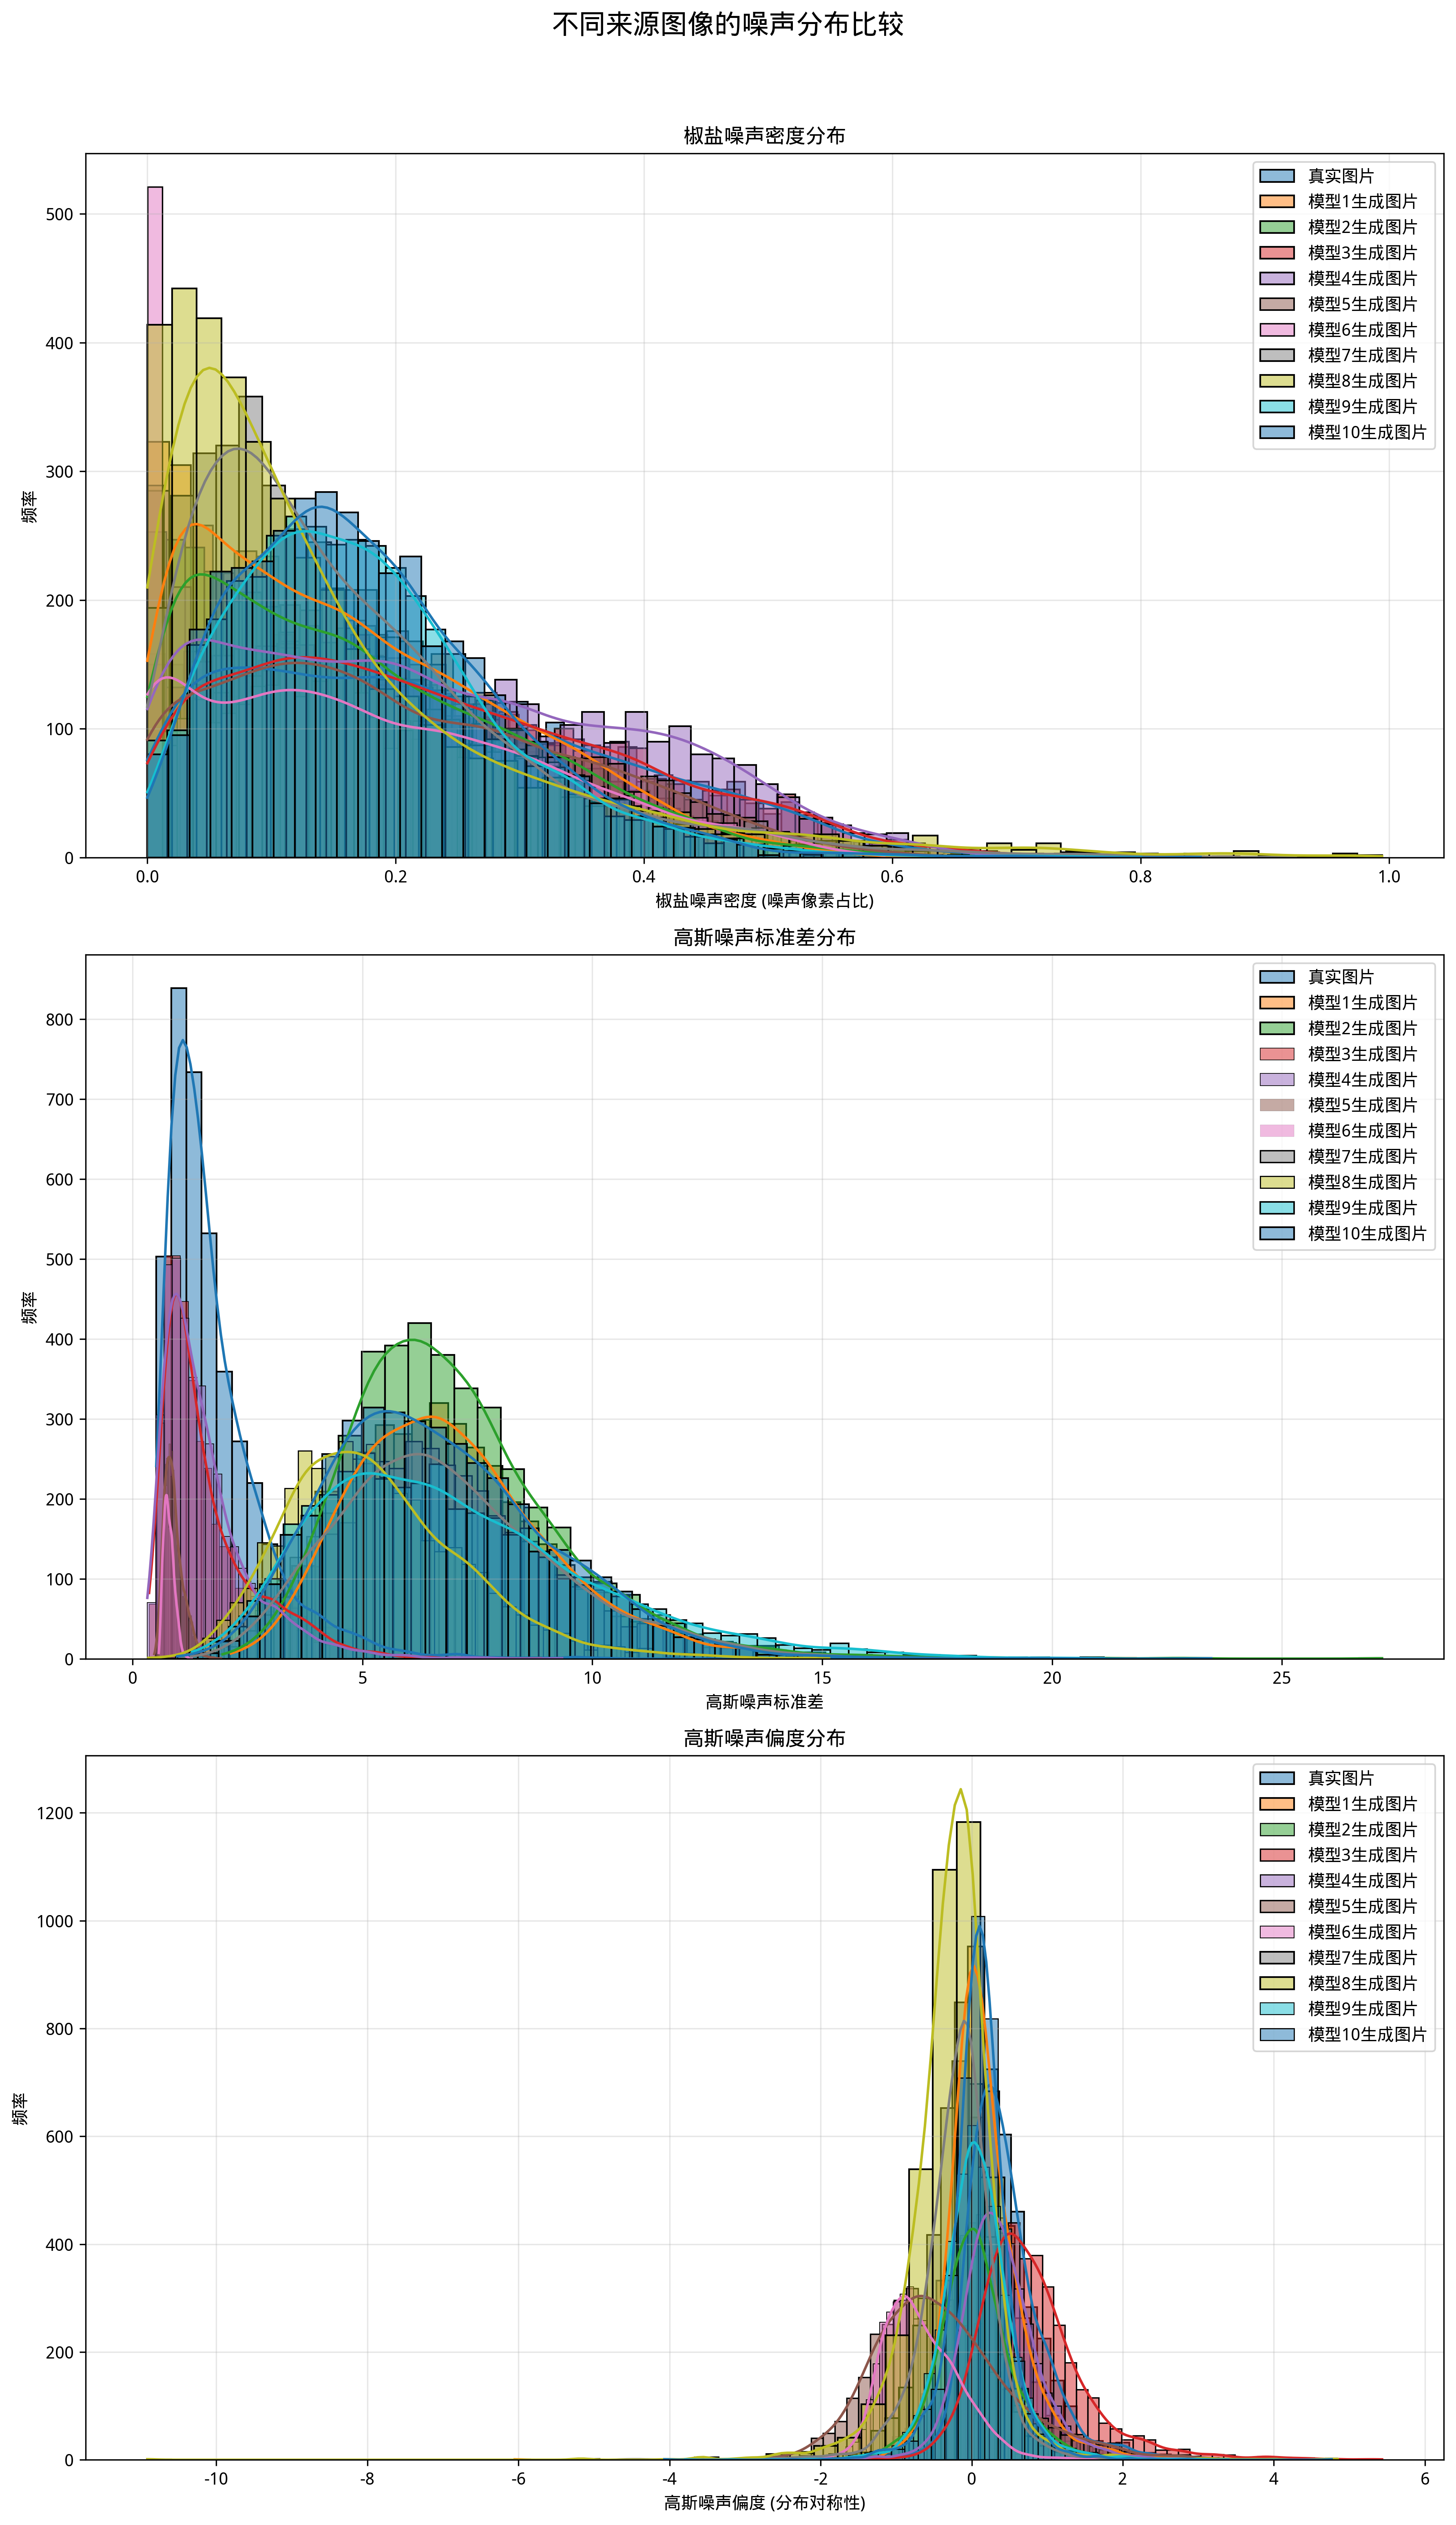


噪声统计结果:
标签        样本数       椒盐噪声密度均值            高斯噪声标准差均值           高斯噪声偏度均值            
真实图片      4000      0.221364            1.792012            0.434703            
模型1生成图片   4000      0.165632            6.999113            0.167359            
模型2生成图片   4000      0.168951            6.990094            0.056646            
模型3生成图片   4000      0.225460            1.653390            0.792730            
模型4生成图片   4000      0.225835            1.604840            0.368162            
模型5生成图片   4000      0.198387            0.886230            -0.374178           
模型6生成图片   4000      0.178493            0.791658            -0.656759           
模型7生成图片   4000      0.161562            6.878568            -0.172480           
模型8生成图片   4000      0.150756            5.300377            -0.257972           
模型9生成图片   4000      0.175181            7.019630            0.069401            
模型10生成图片  4000      0.177686            6.675915            0.102837            


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import seaborn as sns
from scipy import ndimage
from scipy.stats import skew
import cv2

def read_image_paths_with_labels(file_path):
    """读取txt文件中的图像路径和标签"""
    if not os.path.exists(file_path):
        print(f"文件不存在: {file_path}")
        return []
    
    with open(file_path, 'r') as f:
        lines = [line.strip().split() for line in f if line.strip()]
    
    # 提取路径和标签
    paths = [line[0] for line in lines]
    labels = [int(line[1]) for line in lines]
    
    return paths, labels

def detect_salt_and_pepper_noise(img_array, threshold=0.05, window_size=3):
    """检测椒盐噪声"""
    # 转换为灰度图
    if len(img_array.shape) == 3:
        img_gray = np.mean(img_array, axis=2).astype(np.uint8)
    else:
        img_gray = img_array
    
    # 计算中值滤波结果
    img_median = ndimage.median_filter(img_gray, size=window_size)
    
    # 计算差异
    diff = np.abs(img_gray - img_median)
    
    # 统计接近0或255的像素比例
    is_black = img_gray < 30
    is_white = img_gray > 225
    is_noise = np.logical_or(is_black, is_white)
    
    # 计算噪声密度（噪声像素占比）
    noise_density = np.mean(is_noise)
    
    return noise_density

def detect_gaussian_noise(img_array, kernel_size=3):
    """检测高斯噪声"""
    # 转换为灰度图
    if len(img_array.shape) == 3:
        img_gray = np.mean(img_array, axis=2).astype(np.float32)
    else:
        img_gray = img_array.astype(np.float32)
    
    # 应用高斯滤波
    img_smooth = cv2.GaussianBlur(img_gray, (kernel_size, kernel_size), 0)
    
    # 计算残差（原始图像与平滑图像的差异）
    residuals = img_gray - img_smooth
    
    # 计算残差的统计特征
    std_dev = np.std(residuals)  # 标准差：反映噪声强度
    skewness = skew(residuals.flatten())  # 偏度：反映噪声分布对称性
    
    return std_dev, skewness

def analyze_image_noise(image_path):
    """分析图像中的噪声特征"""
    try:
        with Image.open(image_path) as img:
            img_array = np.array(img)
            
            # 检测椒盐噪声
            salt_pepper_density = detect_salt_and_pepper_noise(img_array)
            
            # 检测高斯噪声
            gaussian_std, gaussian_skew = detect_gaussian_noise(img_array)
            
            return {
                'salt_pepper_density': salt_pepper_density,
                'gaussian_std': gaussian_std,
                'gaussian_skew': gaussian_skew
            }
    except Exception as e:
        print(f"无法处理图像 {image_path}: {e}")
        return None

def analyze_noise_distribution(paths, labels):
    """分析不同标签图像的噪声分布"""
    print("开始分析图像噪声...")
    
    # 存储每个标签的噪声指标
    noise_metrics = {}
    
    for path, label in zip(paths, labels):
        if not os.path.exists(path):
            print(f"警告: 图像路径不存在 - {path}")
            continue
            
        metrics = analyze_image_noise(path)
        if metrics is not None:
            if label not in noise_metrics:
                noise_metrics[label] = {
                    'salt_pepper_density': [],
                    'gaussian_std': [],
                    'gaussian_skew': []
                }
            noise_metrics[label]['salt_pepper_density'].append(metrics['salt_pepper_density'])
            noise_metrics[label]['gaussian_std'].append(metrics['gaussian_std'])
            noise_metrics[label]['gaussian_skew'].append(metrics['gaussian_skew'])
    
    # 计算统计信息
    stats = {}
    for label, metrics in noise_metrics.items():
        stats[label] = {
            'count': len(metrics['salt_pepper_density']),
            'salt_pepper_mean': np.mean(metrics['salt_pepper_density']),
            'salt_pepper_median': np.median(metrics['salt_pepper_density']),
            'salt_pepper_std': np.std(metrics['salt_pepper_density']),
            'gaussian_std_mean': np.mean(metrics['gaussian_std']),
            'gaussian_std_median': np.median(metrics['gaussian_std']),
            'gaussian_std_std': np.std(metrics['gaussian_std']),
            'gaussian_skew_mean': np.mean(metrics['gaussian_skew']),
            'gaussian_skew_median': np.median(metrics['gaussian_skew']),
            'gaussian_skew_std': np.std(metrics['gaussian_skew']),
        }
    
    return noise_metrics, stats

def plot_noise_distribution(noise_metrics, stats):
    """绘制不同标签图像的噪声分布"""
    # 设置图片清晰度和字体
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'WenQuanYi Zen Hei']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 创建标签名称映射
    label_names = {0: '真实图片'}
    for label in noise_metrics.keys():
        if label != 0:
            label_names[label] = f'模型{label}生成图片'
    
    # 创建3x1子图布局
    fig, axes = plt.subplots(3, 1, figsize=(12, 21))
    fig.suptitle('不同来源图像的噪声分布比较', fontsize=16)
    
    # 1. 椒盐噪声密度分布
    ax = axes[0]
    for label, metrics in noise_metrics.items():
        sns.histplot(metrics['salt_pepper_density'], bins=50, kde=True, alpha=0.5, 
                     label=label_names[label], ax=ax)
    
    ax.set_title('椒盐噪声密度分布')
    ax.set_xlabel('椒盐噪声密度 (噪声像素占比)')
    ax.set_ylabel('频率')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # 2. 高斯噪声标准差分布
    ax = axes[1]
    for label, metrics in noise_metrics.items():
        sns.histplot(metrics['gaussian_std'], bins=50, kde=True, alpha=0.5, 
                     label=label_names[label], ax=ax)
    
    ax.set_title('高斯噪声标准差分布')
    ax.set_xlabel('高斯噪声标准差')
    ax.set_ylabel('频率')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # 3. 高斯噪声偏度分布
    ax = axes[2]
    for label, metrics in noise_metrics.items():
        sns.histplot(metrics['gaussian_skew'], bins=50, kde=True, alpha=0.5, 
                     label=label_names[label], ax=ax)
    
    ax.set_title('高斯噪声偏度分布')
    ax.set_xlabel('高斯噪声偏度 (分布对称性)')
    ax.set_ylabel('频率')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # 调整布局
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 为suptitle留出空间
    plt.show()
    
    # 打印详细统计数据
    print("\n噪声统计结果:")
    print(f"{'标签':<10}{'样本数':<10}{'椒盐噪声密度均值':<20}{'高斯噪声标准差均值':<20}{'高斯噪声偏度均值':<20}")
    for label in sorted(noise_metrics.keys()):
        s = stats[label]
        print(f"{label_names[label]:<10}{s['count']:<10}{s['salt_pepper_mean']:<20.6f}{s['gaussian_std_mean']:<20.6f}{s['gaussian_skew_mean']:<20.6f}")

# 文件路径
train_file = '/mnt/workspace/POSE/dataset/annotations/train_list.txt'

# 读取图像路径和标签
paths, labels = read_image_paths_with_labels(train_file)
print(f"总图像数量: {len(paths)}")

# 分析噪声分布
noise_metrics, stats = analyze_noise_distribution(paths, labels)

# 绘制分布图表
plot_noise_distribution(noise_metrics, stats)

# 边缘分析

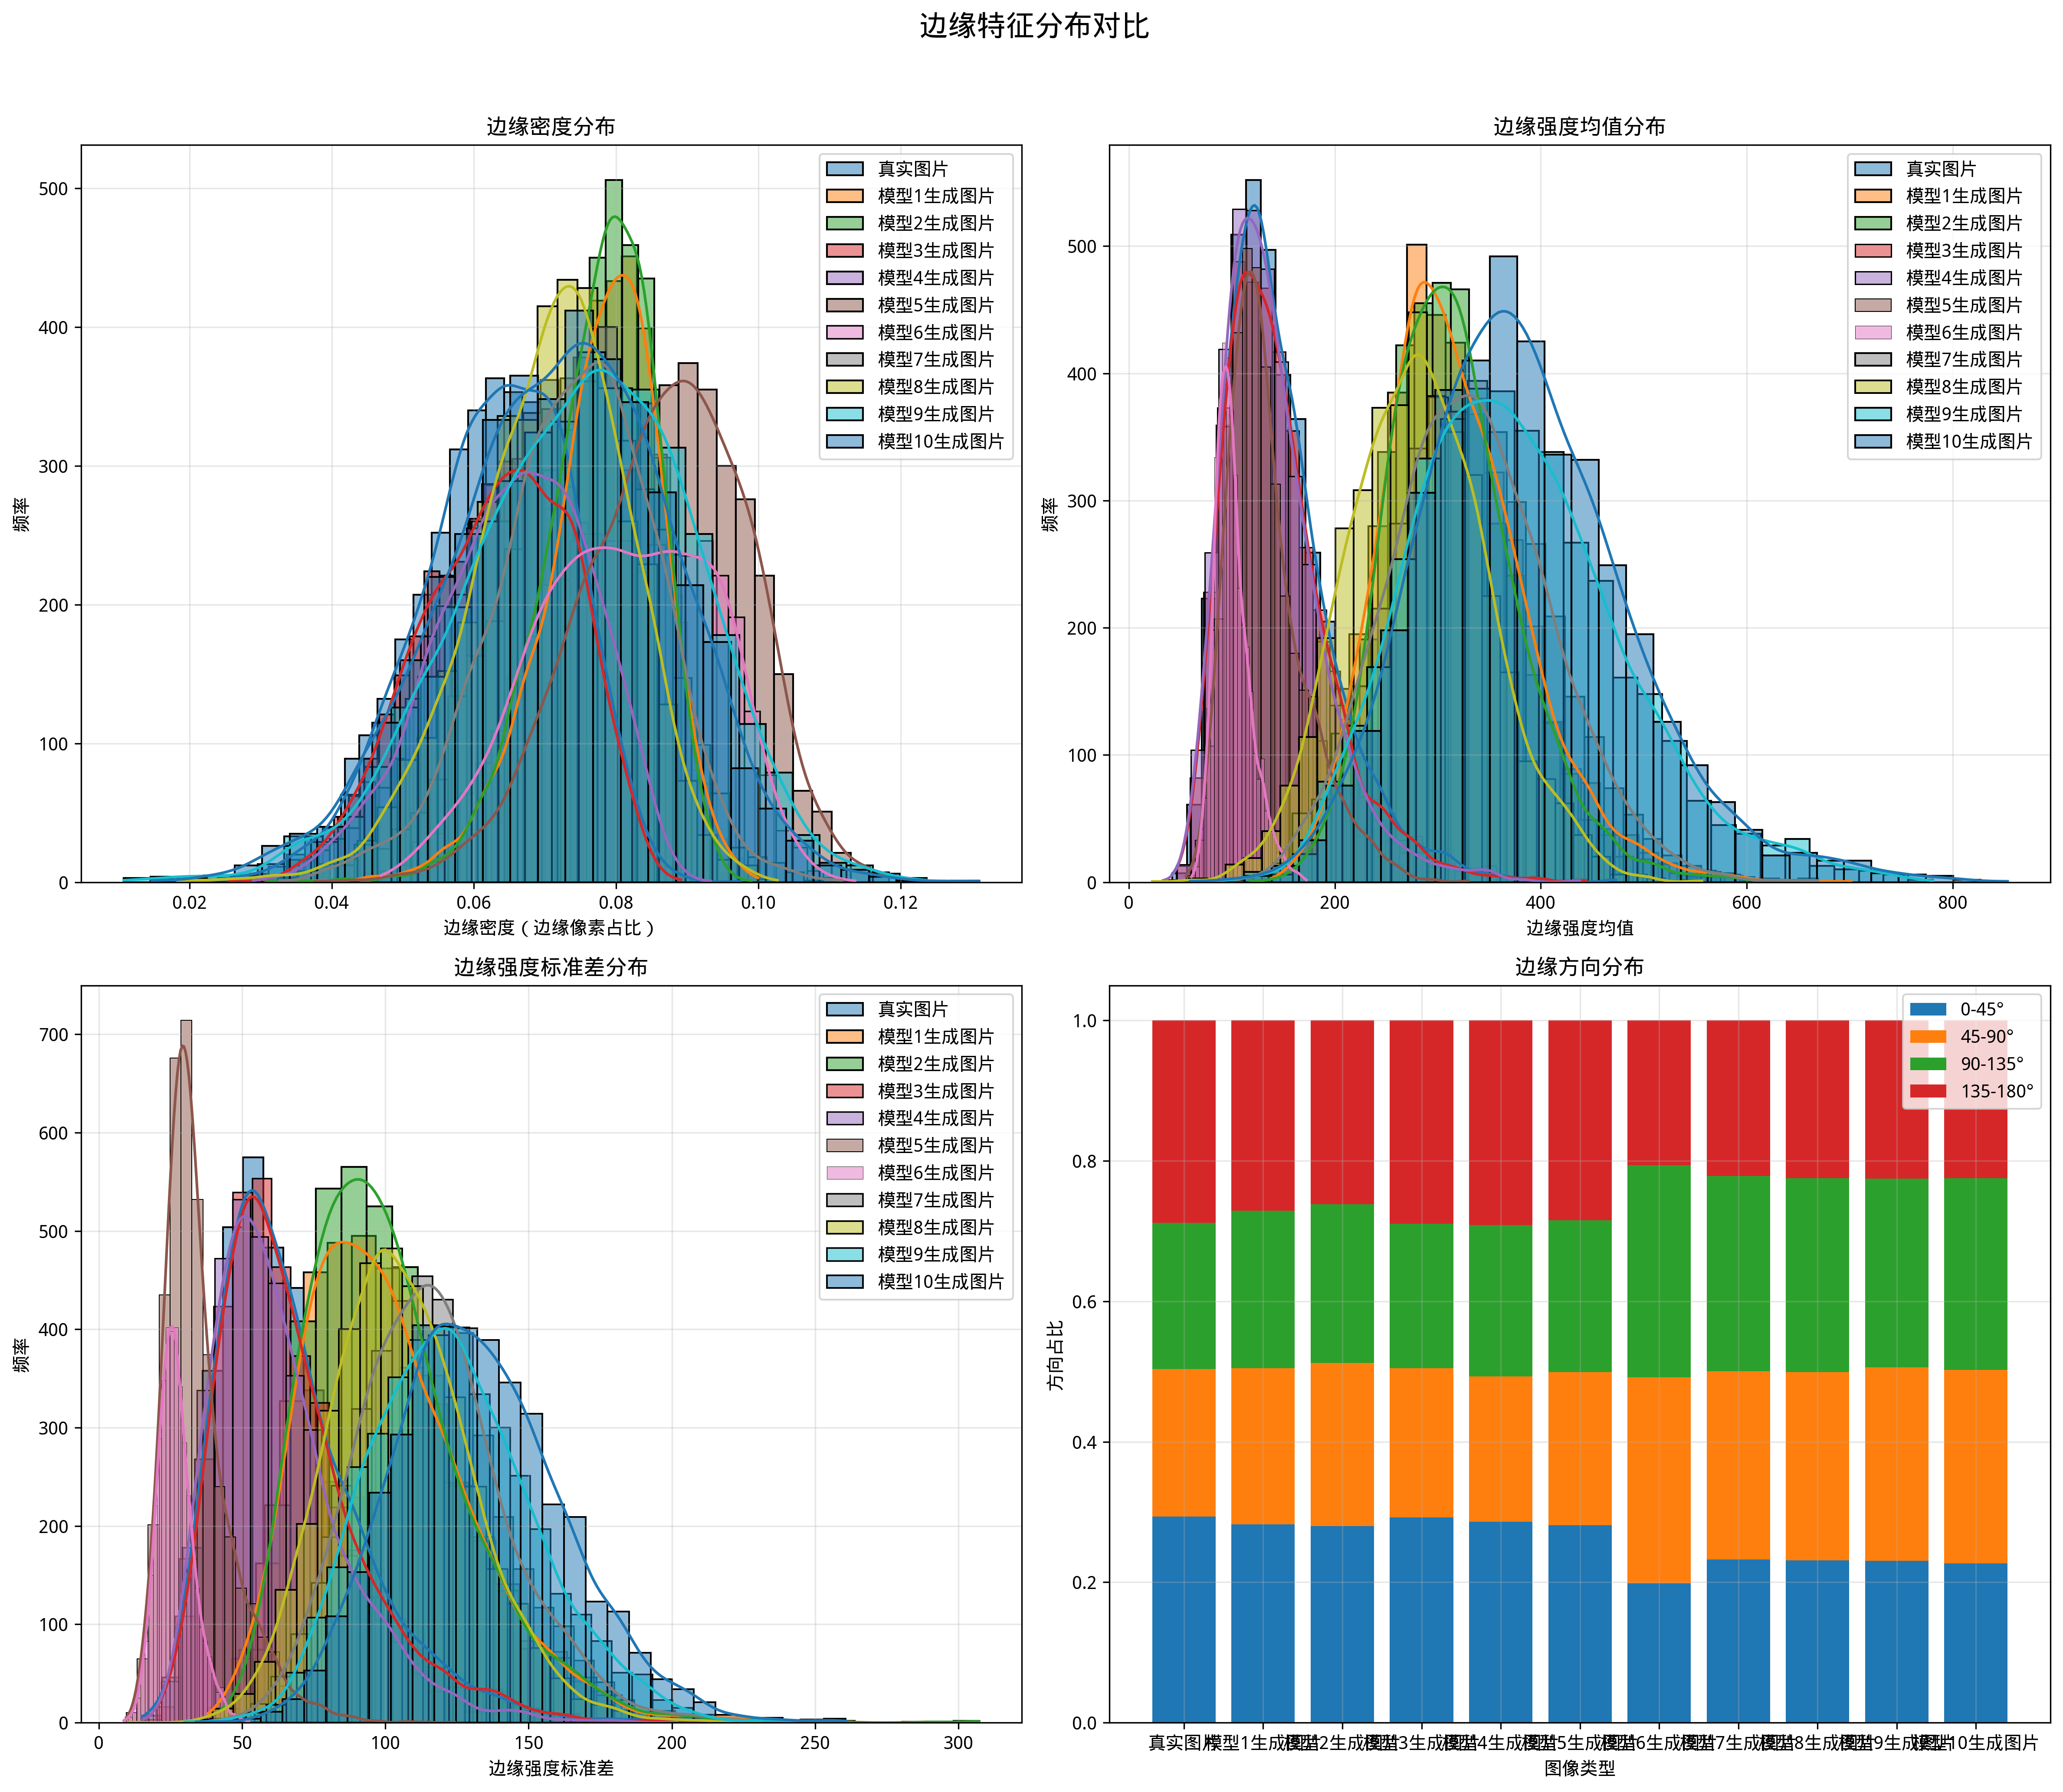


边缘特征统计（均值±标准差）：
标签          样本数   密度            强度均值        强度标准差       方向1     方向2     方向3     方向4     
真实图片        4000  0.0630±0.0106 146.80±52.8967.57±26.41 29.37%  20.98%  20.83%  28.81%  
模型1生成图片     4000  0.0779±0.0083 316.67±69.72100.83±29.5628.23%  22.24%  22.41%  27.12%  
模型2生成图片     4000  0.0777±0.0079 314.98±64.19100.76±28.6428.01%  23.20%  22.60%  26.19%  
模型3生成图片     4000  0.0633±0.0104 144.79±52.0266.99±25.49 29.23%  21.26%  20.60%  28.92%  
模型4生成图片     4000  0.0656±0.0107 140.95±49.6862.99±23.33 28.64%  20.69%  21.56%  29.11%  
模型5生成图片     4000  0.0867±0.0116 134.36±38.1034.93±12.70 28.12%  21.80%  21.64%  28.44%  
模型6生成图片     4000  0.0810±0.0122 101.01±17.3726.73±6.29  19.87%  29.30%  30.20%  20.62%  
模型7生成图片     4000  0.0742±0.0112 331.36±78.24116.27±26.7523.22%  26.80%  27.81%  22.17%  
模型8生成图片     4000  0.0707±0.0110 281.12±68.23105.68±25.2023.13%  26.79%  27.64%  22.44%  
模型9生成图片     4000  0.0746±0.0160 375.88±102.46123.39±28.7223.06%  27.55%  26.87%  22.52%  
模型1

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import defaultdict

def read_image_paths_with_labels(file_path):
    """读取图像路径和标签"""
    if not os.path.exists(file_path):
        print(f"文件不存在: {file_path}")
        return [], []
    with open(file_path, 'r') as f:
        lines = [line.strip().split() for line in f if line.strip()]
    paths = [line[0] for line in lines]
    labels = [int(line[1]) for line in lines]
    return paths, labels

def extract_edge_features(image_path, threshold_factor=1.5):
    """提取边缘特征：密度、强度统计、方向分布"""
    try:
        with Image.open(image_path) as img:
            img_gray = img.convert('L')  # 转灰度图
            img_array = np.array(img_gray, dtype=np.float32)
            
            # Sobel梯度计算（x和y方向）
            dx = cv2.Sobel(img_array, cv2.CV_64F, 1, 0, ksize=3)
            dy = cv2.Sobel(img_array, cv2.CV_64F, 0, 1, ksize=3)
            
            # 梯度幅值（强度）和方向（0-180°）
            magnitude = np.sqrt(dx**2 + dy**2)
            direction = np.arctan2(dy, dx) * (180 / np.pi)  # 弧度转度数
            direction = (direction + 180) % 180  # 归一到0-180°
            
            # 筛选显著边缘（强度 > 均值 + 1.5×标准差，抑制噪声）
            mean_mag = np.mean(magnitude)
            std_mag = np.std(magnitude)
            edge_mask = magnitude > (mean_mag + threshold_factor * std_mag)
            
            # 统计特征
            edge_pixels = np.sum(edge_mask)
            total_pixels = img_array.size
            edge_density = edge_pixels / total_pixels if total_pixels > 0 else 0
            
            # 边缘强度统计（仅边缘区域）
            edge_magnitudes = magnitude[edge_mask]
            mean_intensity = np.mean(edge_magnitudes) if edge_pixels > 0 else 0
            std_intensity = np.std(edge_magnitudes) if edge_pixels > 0 else 0
            
            # 方向分布（4个区间：0-45°, 45-90°, 90-135°, 135-180°）
            dir_bins = [0, 45, 90, 135, 180]
            dir_hist, _ = np.histogram(direction[edge_mask], bins=dir_bins)
            dir_distribution = dir_hist / edge_pixels if edge_pixels > 0 else np.zeros(4)
            
            return {
                'edge_density': edge_density,
                'mean_intensity': mean_intensity,
                'std_intensity': std_intensity,
                'dir_distribution': dir_distribution
            }
    except Exception as e:
        print(f"处理图像 {image_path} 失败: {e}")
        return None

def analyze_edge_features(paths, labels):
    """按标签聚合边缘特征"""
    edge_metrics = defaultdict(lambda: {
        'edge_density': [],
        'mean_intensity': [],
        'std_intensity': [],
        'dir_distribution': []  # 每个样本的4个方向占比
    })
    
    for path, label in zip(paths, labels):
        features = extract_edge_features(path)
        if features:
            edge_metrics[label]['edge_density'].append(features['edge_density'])
            edge_metrics[label]['mean_intensity'].append(features['mean_intensity'])
            edge_metrics[label]['std_intensity'].append(features['std_intensity'])
            edge_metrics[label]['dir_distribution'].append(features['dir_distribution'])
    
    # 计算统计量（均值、标准差）
    stats = {}
    for label in edge_metrics:
        metrics = edge_metrics[label]
        # 方向分布的均值和标准差
        dir_distribution = np.array(metrics['dir_distribution'])
        dir_mean = np.mean(dir_distribution, axis=0)
        dir_std = np.std(dir_distribution, axis=0)
        
        stats[label] = {
            'count': len(metrics['edge_density']),
            'edge_density_mean': np.mean(metrics['edge_density']),
            'edge_density_std': np.std(metrics['edge_density']),
            'mean_intensity_mean': np.mean(metrics['mean_intensity']),
            'mean_intensity_std': np.std(metrics['mean_intensity']),
            'std_intensity_mean': np.mean(metrics['std_intensity']),
            'std_intensity_std': np.std(metrics['std_intensity']),
            'dir_mean': dir_mean,  # [0-45°, 45-90°, 90-135°, 135-180°] 占比均值
            'dir_std': dir_std     # 各方向占比的标准差
        }
    return edge_metrics, stats

def plot_edge_features(edge_metrics, stats, label_names):
    """可视化边缘特征分布"""
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'WenQuanYi Zen Hei']
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    fig.suptitle('边缘特征分布对比', fontsize=16)
    
    # 1. 边缘密度分布
    ax = axes[0, 0]
    for label in edge_metrics:
        sns.histplot(edge_metrics[label]['edge_density'], bins=30, kde=True, alpha=0.5, 
                     label=label_names[label], ax=ax)
    ax.set_title('边缘密度分布')
    ax.set_xlabel('边缘密度（边缘像素占比）')
    ax.set_ylabel('频率')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 2. 边缘强度均值分布
    ax = axes[0, 1]
    for label in edge_metrics:
        sns.histplot(edge_metrics[label]['mean_intensity'], bins=30, kde=True, alpha=0.5, 
                     label=label_names[label], ax=ax)
    ax.set_title('边缘强度均值分布')
    ax.set_xlabel('边缘强度均值')
    ax.set_ylabel('频率')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 3. 边缘强度标准差分布
    ax = axes[1, 0]
    for label in edge_metrics:
        sns.histplot(edge_metrics[label]['std_intensity'], bins=30, kde=True, alpha=0.5, 
                     label=label_names[label], ax=ax)
    ax.set_title('边缘强度标准差分布')
    ax.set_xlabel('边缘强度标准差')
    ax.set_ylabel('频率')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 4. 边缘方向分布（堆叠直方图）
    ax = axes[1, 1]
    dir_labels = ['0-45°', '45-90°', '90-135°', '135-180°']
    sorted_labels = sorted(edge_metrics.keys())
    x_ticks = [label_names[label] for label in sorted_labels]
    
    # 初始化堆叠底部
    bottom = np.zeros(len(sorted_labels))
    for i in range(4):  # 遍历4个方向区间
        for idx, label in enumerate(sorted_labels):
            mean = stats[label]['dir_mean'][i]
            ax.bar(idx, mean, bottom=bottom[idx], color=f'C{i}', 
                   label=dir_labels[i] if idx == 0 else "")
            bottom[idx] += mean  # 更新堆叠底部
    
    ax.set_xticks(range(len(sorted_labels)), x_ticks)
    ax.set_title('边缘方向分布')
    ax.set_xlabel('图像类型')
    ax.set_ylabel('方向占比')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # 打印统计结果（拆分格式化，避免嵌套）
    print("\n边缘特征统计（均值±标准差）：")
    print(f"{'标签':<12}{'样本数':<6}{'密度':<14}{'强度均值':<12}{'强度标准差':<12}{'方向1':<8}{'方向2':<8}{'方向3':<8}{'方向4':<8}")
    for label in sorted(edge_metrics.keys()):
        s = stats[label]
        dir_means = [f"{v:.2%}" for v in s['dir_mean']]
        
        # 1. 预构建带“±”的字符串
        density_str = f"{s['edge_density_mean']:.4f}±{s['edge_density_std']:.4f}"
        intensity_mean_str = f"{s['mean_intensity_mean']:.2f}±{s['mean_intensity_std']:.2f}"
        intensity_std_str = f"{s['std_intensity_mean']:.2f}±{s['std_intensity_std']:.2f}"
        
        # 2. 统一左对齐输出
        print(
            f"{label_names[label]:<12}"
            f"{s['count']:<6}"
            f"{density_str:<14}"
            f"{intensity_mean_str:<12}"
            f"{intensity_std_str:<12}"
            f"{dir_means[0]:<8}{dir_means[1]:<8}{dir_means[2]:<8}{dir_means[3]:<8}"
        )
                

# ---------------------- 主程序 ---------------------- #
train_file = '/mnt/workspace/POSE/dataset/annotations/train_list.txt'
paths, labels = read_image_paths_with_labels(train_file)

# 构建标签名称映射
label_names = {0: '真实图片'}
unique_labels = set(labels)
for label in unique_labels:
    if label != 0:
        label_names[label] = f'模型{label}生成图片'

# 分析边缘特征
edge_metrics, stats = analyze_edge_features(paths, labels)

# 可视化与输出
if edge_metrics:
    plot_edge_features(edge_metrics, stats, label_names)
else:
    print("未检测到有效图像，分析终止。")

# 直方图分析

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image



def read_annotations(script_dir, data_path, debug=False, shuffle=True):
    """
    读取注释文件并返回数据列表。

    参数:
    - data_path: 数据路径，用于读取样本路径和标签信息的文件。
    - debug: 调试模式，如果为True，则只返回前1000个样本，默认为False。
    - shuffle: 是否打乱数据，默认为True。

    返回:
    - data: 包含样本路径和标签的列表。
    """
    # 读取数据文件，按行去空格
    lines = map(str.strip, open(data_path).readlines())
    data = []
    for line in lines:
        # 分割每行数据，获取样本路径和标签
        sample_path, label = line.split('\t')
        # 修改样本路径中的特定字符串
        sample_path = os.path.join(script_dir, sample_path).replace('fanglingfei','yangtianyun').replace('./','')
        # 将标签转换为整数
        label = int(label)
        # 将处理后的样本路径和标签添加到数据列表中
        data.append((sample_path, label))
    # random.shuffle(data)  # 打乱数据顺序，已通过参数暴露该功能，可根据需要启用
    if debug:
        # 如果是调试模式，仅保留前1000个样本
        data=data[:1000]
    return data



def split_data_by_label(data, num_classes):
    # 初始化指定数量的空列表
    label_paths = [[] for _ in range(num_classes)]

    # 遍历数据，将路径按标签存入对应列表
    for path, label in data:
        # 确保标签在有效范围内
        if 0 <= label < num_classes:
            label_paths[label].append(path)

    return label_paths




def plot_rgb_histograms(label_paths, num_samples=1000):
    # 确保有真实图片和至少一类虚假图片
    if len(label_paths) < 2:
        raise ValueError("需要至少一个真实图片类别和一个虚假图片类别")

    real_image_paths = label_paths[0]  # 第一个子列表是真实图片
    num_fake_classes = len(label_paths) - 1  # 虚假图片的类别数

    # 计算画布大小
    cols = 2  # 每对对比图占两列
    rows = num_fake_classes  # 每个虚假类别占一行
    fig = plt.figure(figsize=(12 * cols, 5 * rows))

    # 共用的加载图像函数
    def load_images(paths, samples):
        selected_paths = np.random.choice(paths, samples, replace=False)
        images = []
        for path in selected_paths:
            try:
                with Image.open(path) as img:
                    img_array = np.array(img.convert('RGB'))
                    images.append(img_array)
            except Exception as e:
                print(f"Error loading image {path}: {e}")
        return images

    # 加载真实图像
    real_images = load_images(real_image_paths, num_samples)
    real_pixels = np.concatenate([img.reshape(-1, 3) for img in real_images if img.size > 0])

    colors = ['r', 'g', 'b']
    
    # 为每个虚假类别生成对比图
    for i in range(num_fake_classes):
        fake_image_paths = label_paths[i + 1]  # 第i+1个子列表是第i类虚假图片

        # 加载当前类别的虚假图像
        fake_images = load_images(fake_image_paths, num_samples)
        fake_pixels = np.concatenate([img.reshape(-1, 3) for img in fake_images if img.size > 0])

        # 计算子图位置
        real_pos = i * cols + 1
        fake_pos = i * cols + 2

        # 绘制真实图像直方图
        ax1 = fig.add_subplot(rows, cols, real_pos)
        for j, c in enumerate(colors):
            ax1.hist(real_pixels[:, j], bins=50, alpha=0.7, color=c, 
                     label=f'Real {["R", "G", "B"][j]}', density=True)
        ax1.set_title(f'Real Images RGB Distribution (对比编号: {i})')
        ax1.legend()

        # 绘制虚假图像直方图
        ax2 = fig.add_subplot(rows, cols, fake_pos)
        for j, c in enumerate(colors):
            ax2.hist(fake_pixels[:, j], bins=50, alpha=0.7, color=c, 
                     label=f'Fake Type-{i} {["R", "G", "B"][j]}', density=True)
        ax2.set_title(f'Fake Type-{i} Images RGB Distribution')
        ax2.legend()
        print(f"fake class {i} compare finished")

    plt.tight_layout()
    plt.savefig('rgb_histograms_comparison.png')
    plt.close()  # 关闭图形以释放内存




script_dir = '/mnt/workspace/POSE'
train_data_path = '/mnt/workspace/POSE/dataset/annotations/train_list.txt'
num_classes = 11

label_paths = split_data_by_label(read_annotations(script_dir, train_data_path), num_classes)
plot_rgb_histograms(label_paths)

# 分析

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage.feature import canny
from skimage.filters import sobel
from skimage.color import rgb2gray
import os
from tqdm import tqdm  # 添加进度条支持

def analyze_edge_features(label_paths, num_samples=20, output_dir='edge_analysis_results'):
    """
    分析真实图片和各类虚假图片的边缘特征差异
    
    参数:
    - label_paths: split_data_by_label生成的路径列表
    - num_samples: 每类图片随机采样数量
    - output_dir: 结果保存目录
    """
    # 创建输出目录
    os.makedirs(output_dir, exist_ok=True)
    
    # 确保有真实图片和至少一类虚假图片
    if len(label_paths) < 2:
        raise ValueError("需要至少一个真实图片类别和一个虚假图片类别")
    
    real_image_paths = label_paths[0]  # 真实图片路径
    num_fake_classes = len(label_paths) - 1  # 虚假图片类别数
    
    # 随机选择样本
    def select_samples(paths):
        return np.random.choice(paths, min(num_samples, len(paths)), replace=False)
    
    # 计算并展示边缘特征
    def compute_edges(img_path):
        try:
            with Image.open(img_path) as img:
                img = img.convert('RGB')
                img_array = np.array(img)
                
                # 转为灰度图
                gray = rgb2gray(img_array)
                
                # 使用Sobel算子计算边缘强度
                sobel_edges = sobel(gray)
                
                # 使用Canny算子计算边缘
                canny_edges = canny(gray, sigma=1.0)
                
                return img_array, sobel_edges, canny_edges
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")
            return None, None, None
    
    # 可视化并保存结果
    def visualize_and_save(real_samples, fake_samples, fake_class_idx):
        fig, axes = plt.subplots(num_samples, 4, figsize=(16, 4 * num_samples))
        
        # 添加内部进度条
        for i in tqdm(range(num_samples), desc=f"处理类别 {fake_class_idx} 的样本", leave=False):
            # 真实图片
            if i < len(real_samples):
                real_img, real_sobel, real_canny = compute_edges(real_samples[i])
                if real_img is not None:
                    # 原图
                    axes[i, 0].imshow(real_img)
                    axes[i, 0].set_title('Real Image')
                    axes[i, 0].axis('off')
                    
                    # Sobel边缘
                    axes[i, 1].imshow(real_sobel, cmap='gray')
                    axes[i, 1].set_title('Sobel Edges')
                    axes[i, 1].axis('off')
                    
                    # Canny边缘
                    axes[i, 2].imshow(real_canny, cmap='gray')
                    axes[i, 2].set_title('Canny Edges')
                    axes[i, 2].axis('off')
                    
                    # 边缘密度对比（直方图）
                    if i == 0:  # 只在第一行显示标题
                        axes[i, 3].set_title('Edge Density')
                    axes[i, 3].hist(real_sobel.flatten(), bins=50, alpha=0.5, label='Real', density=True)
                    axes[i, 3].set_xlim(0, 0.5)  # 限制范围以便更好观察
                    axes[i, 3].legend()
            
            # 虚假图片
            if i < len(fake_samples):
                fake_img, fake_sobel, fake_canny = compute_edges(fake_samples[i])
                if fake_img is not None:
                    # 原图
                    axes[i, 0].imshow(fake_img)
                    axes[i, 0].set_title(f'Fake Type-{fake_class_idx}')
                    axes[i, 0].axis('off')
                    
                    # Sobel边缘
                    axes[i, 1].imshow(fake_sobel, cmap='gray')
                    axes[i, 1].set_title('Sobel Edges')
                    axes[i, 1].axis('off')
                    
                    # Canny边缘
                    axes[i, 2].imshow(fake_canny, cmap='gray')
                    axes[i, 2].set_title('Canny Edges')
                    axes[i, 2].axis('off')
                    
                    # 边缘密度对比
                    axes[i, 3].hist(fake_sobel.flatten(), bins=50, alpha=0.5, label=f'Fake Type-{fake_class_idx}', density=True)
                    axes[i, 3].set_xlim(0, 0.5)
                    axes[i, 3].legend()
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f'edge_comparison_type_{fake_class_idx}.png'))
        plt.close()
    
    # 生成边缘强度统计对比图
    def generate_statistics(real_samples, all_fake_samples):
        plt.figure(figsize=(12, 5 * num_fake_classes))
        
        # 为每个虚假类别生成统计
        for i, fake_samples in enumerate(all_fake_samples):
            real_edge_intensities = []
            fake_edge_intensities = []
            
            # 计算真实图片边缘强度
            for path in tqdm(real_samples, desc=f"计算真实图片边缘强度 (类别 {i})", leave=False):
                _, sobel_edges, _ = compute_edges(path)
                if sobel_edges is not None:
                    real_edge_intensities.append(np.mean(sobel_edges))
            
            # 计算虚假图片边缘强度
            for path in tqdm(fake_samples, desc=f"计算虚假图片边缘强度 (类别 {i})", leave=False):
                _, sobel_edges, _ = compute_edges(path)
                if sobel_edges is not None:
                    fake_edge_intensities.append(np.mean(sobel_edges))
            
            # 绘制箱线图对比
            plt.subplot(num_fake_classes, 1, i + 1)
            plt.boxplot([real_edge_intensities, fake_edge_intensities], labels=['Real', f'Fake Type-{i}'])
            plt.title(f'Edge Intensity Comparison (Type-{i})')
            plt.ylabel('Average Edge Intensity')
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'edge_intensity_statistics.png'))
        plt.close()
    
    # 随机选择样本
    real_samples = select_samples(real_image_paths)
    all_fake_samples = []
    
    # 对每类虚假图片进行对比分析
    for i in tqdm(range(num_fake_classes), desc="处理类别"):
        fake_image_paths = label_paths[i + 1]
        fake_samples = select_samples(fake_image_paths)
        all_fake_samples.append(fake_samples)
        
        visualize_and_save(real_samples, fake_samples, i)
    
    # 生成边缘强度统计对比图
    generate_statistics(real_samples, all_fake_samples)
    
    print(f"边缘特征分析结果已保存至: {output_dir}")

# 使用示例

label_paths = split_data_by_label(read_annotations(script_dir, train_data_path), num_classes=11)
analyze_edge_features(label_paths)    

处理类别: 100%|██████████| 10/10 [03:39<00:00, 21.91s/it]             
/tmp/ipykernel_16424/1906350318.py:138: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([real_edge_intensities, fake_edge_intensities], labels=['Real', f'Fake Type-{i}'])
/tmp/ipykernel_16424/1906350318.py:138: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([real_edge_intensities, fake_edge_intensities], labels=['Real', f'Fake Type-{i}'])
/tmp/ipykernel_16424/1906350318.py:138: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([real_edge_intensities, fake_edge_intensities], labels=['Real', f'Fake Type-{i}'])
/tmp/ipykernel_

边缘特征分析结果已保存至: edge_analysis_results
